In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import matplotlib

# Set matplotlib parameters
mplparams = {
    'text.usetex': True,  # use LaTeX for all text
    'axes.linewidth': 1,  # set axes linewidths to 1
    'axes.grid': False,  # add a grid
    'axes.labelweight': 'normal',
    'font.family': 'DejaVu Sans',
    'font.size': 20  # Reduced from 22 to prevent overlap
}
matplotlib.rcParams.update(mplparams)
plt.rcParams["mathtext.fontset"] = "cm"

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [234]:
import numpy as np
def grid_size(m, T, factor=1):
    df = 2 * np.sqrt(3*m) / np.pi / T
    df1 = 12 * np.sqrt(5*m) / np.pi / T**2
    df2 = 20 * np.sqrt(7*m) / np.pi / T**3
    return [df*factor, df1*factor, df2*factor]

m = 0.2 
tcoh = 86400*5
factor = 4
dx = grid_size(m, tcoh, factor)

In [248]:
grid_size(0.1, 5*86400, 10)

[8.071551154618712e-06, 1.447267740736089e-10, 6.606598319213759e-16]

In [249]:
grid_size(0.1, 50*86400, 10)

[8.071551154618713e-07, 1.447267740736089e-12, 6.606598319213758e-19]

In [250]:
dx = [5e-5, 1e-10, 1e-18]

In [121]:
m = 0.2 
tcoh = 86400*5
factor = 4
dx = grid_size(m, tcoh, factor)

In [261]:
homedir = '/home/hoitim.cheung/glitch/'
df = pd.read_csv('./data/no_glitch/100-100Hz/signal_glitch_params.csv')
n = 1
tcoh_day = 10
fmin = 100
fmax = 1000
label = 'no_glitch'

for i in range(1):
        command = (
            f"lalpulsar_Weave "
            f"--output-file={homedir}/results/{tcoh_day}d/{label}/{fmin}-{fmax}Hz/{label}_CW{i}.fts "
            f"--sft-files=./data/with_glitch/simCW0/H-4800_H1_1800SFT_simCW0_NBF0449Hz0W0002Hz0-1368970000-8640000.sft "
            f"--setup-file={homedir}/metric/metric_{tcoh_day}d.fts "
            f"--semi-max-mismatch=0.2 "
            f"--coh-max-mismatch=0.1 "
            f"--toplist-limit=1000 "
            f"--extra-statistics='coh2F_det,mean2F,coh2F_det,mean2F_det' "
            f"--alpha={df['alpha'][i*n_glitch]}/0 "
            f"--delta={df['delta'][i*n_glitch]}/0 "
            f"--freq={df['f0'][i*n_glitch]-dx[0]}/{2*dx[0]} "
            f"--f1dot={df['f1'][i*n_glitch]-dx[1]}/{2*dx[1]} "
            f"--f2dot={df['f2'][i*n_glitch]-dx[2]}/{2*dx[2]}"
        )

In [262]:
command

"lalpulsar_Weave --output-file=/home/hoitim.cheung/glitch//results/10d/no_glitch/100-1000Hz/no_glitch_CW0.fts --sft-files=./data/with_glitch/simCW0/H-4800_H1_1800SFT_simCW0_NBF0449Hz0W0002Hz0-1368970000-8640000.sft --setup-file=/home/hoitim.cheung/glitch//metric/metric_10d.fts --semi-max-mismatch=0.2 --coh-max-mismatch=0.1 --toplist-limit=1000 --extra-statistics='coh2F_det,mean2F,coh2F_det,mean2F_det' --alpha=6.12376766/0 --delta=1.0264611/0 --freq=99.99995/0.0001 --f1dot=-5.38496533e-09/2e-10 --f2dot=-1e-18/2e-18"

"lalpulsar_Weave --output-file='test_glitch_10d.fts' --sft-files='./data/with_glitch/simCW0/H-4800_H1_1800SFT_simCW0_NBF0449Hz0W0002Hz0-1368970000-8640000.sft' --setup-file='test_metric_10d.fts' --semi-max-mismatch=0.2 --coh-max-mismatch=0.1 --toplist-limit=1000 --extra-statistics='coh2F_det,mean2F,coh2F_det,mean2F_det' --alpha=6.12376766/0 --delta=1.0264611/0 --freq=449.9999988585103/2.2829794224499995e-06 --f1dot=-2.587827352833667e-08/2.046745667334045e-11 --f2dot=-1.6439552550458482e-17/4.671570472091696e-17"

lalpulsar_Weave --output-file='test_glitch.fts' --sft-files='./data/with_glitch/simCW0/H-4800_H1_1800SFT_simCW0_NBF0449Hz0W0002Hz0-1368970000-8640000.sft' --setup-file='test_metric.fts' --semi-max-mismatch=0.2 --coh-max-mismatch=0.1 --toplist-limit=1000 --extra-statistics='coh2F_det,mean2F,coh2F_det,mean2F_det' --alpha=6.12376766/0 --delta=1.0264611/0 --freq=449.9999988585103/2.2829794224499995e-06 --f1dot=-2.587827352833667e-08/2.046745667334045e-11 --f2dot=-1.6439552550458482e-17/4.671570472091696e-17

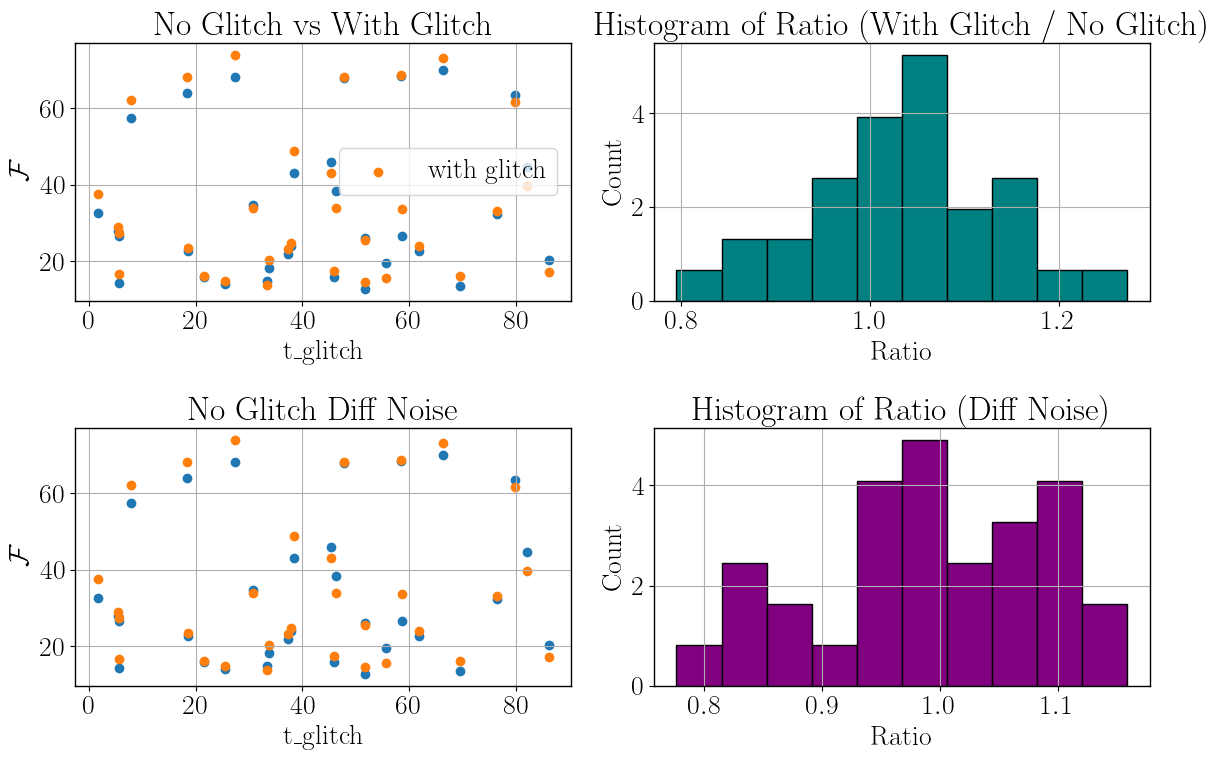

In [264]:
# Load the CSV file
df = pd.read_csv('./data/with_glitch_onlytglitch/100-100Hz/signal_glitch_params.csv')

# Extract parameters
n_glitch = 1  # n glitch per signal
f0 = df['f0'][::n_glitch].values  # size of 32
f1 = df['f1'][::n_glitch].values
f2 = df['f2'][::n_glitch].values
df_p = df['df_p'].values
df_t = df['df_t'].values
df1_p = df['df1_p'].values
q = df['Q'].values
t_glitch = df['tglitch_day'].values

# Initialize arrays
a = np.zeros(32)  # No Glitch
b = np.zeros(32)  # With Glitch
c = np.zeros(32)  # No Glitch Diff Noise
f0_list = np.zeros((32, 2))
f1_list = np.zeros((32, 2))
f2_list = np.zeros((32, 2))

# Load data
for i in range(32):
    d1 = fits.open(f'./results/5d/no_glitch/100-100Hz/no_glitch_CW{i}.fts')
    d2 = fits.open(f'./results/5d/with_glitch_onlytglitch/100-100Hz/with_glitch_onlytglitch_CW{i}.fts')
    d3 = fits.open(f'./results/5d/no_glitch_diffnoise/100-100Hz/no_glitch_diffnoise_CW{i}.fts')

    a[i] = d1[1].data['mean2F'][0]
    b[i] = d2[1].data['mean2F'][0]
    c[i] = d3[1].data['mean2F'][0]

    f0_list[i, 0] = d1[1].data['freq'][0]
    f1_list[i, 0] = d1[1].data['f1dot'][0]
    f2_list[i, 0] = d1[1].data['f2dot'][0]

    f0_list[i, 1] = d2[1].data['freq'][0]
    f1_list[i, 1] = d2[1].data['f1dot'][0]
    f2_list[i, 1] = d2[1].data['f2dot'][0]

# Create a 2x2 subplot layout
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Scatter plot: No Glitch vs With Glitch
ax[0, 0].scatter(t_glitch, a)
ax[0, 0].scatter(t_glitch, b, label='with glitch')
ax[0, 0].set_xlabel('t_glitch')
ax[0, 0].set_ylabel(r'$\mathcal{F}$')
ax[0, 0].legend()
ax[0, 0].grid(True)
ax[0, 0].set_title('No Glitch vs With Glitch')

# Histogram: Ratio (No Glitch / With Glitch)
ratios1 = b/a
ax[0, 1].hist(ratios1, bins=10, color='teal', edgecolor='black', density=True)
ax[0, 1].set_xlabel('Ratio')
ax[0, 1].set_ylabel('Count')
ax[0, 1].grid(True)
ax[0, 1].set_title('Histogram of Ratio (With Glitch / No Glitch)')

# Scatter plot: No Glitch vs No Glitch Diff Noise
ax[1, 0].scatter(t_glitch, a)
ax[1, 0].scatter(t_glitch, b)
ax[1, 0].set_xlabel('t_glitch')
ax[1, 0].set_ylabel(r'$\mathcal{F}$')
#ax[1, 0].legend()
ax[1, 0].grid(True)
ax[1, 0].set_title('No Glitch Diff Noise')

# Histogram: Ratio (No Glitch / No Glitch Diff Noise)
ratios2 = c/a
ax[1, 1].hist(ratios2, bins=10, color='purple', edgecolor='black', density=True)
ax[1, 1].set_xlabel('Ratio')
ax[1, 1].set_ylabel('Count')
ax[1, 1].grid(True)
ax[1, 1].set_title('Histogram of Ratio (Diff Noise)')

# Adjust layout
plt.tight_layout()
plt.show()

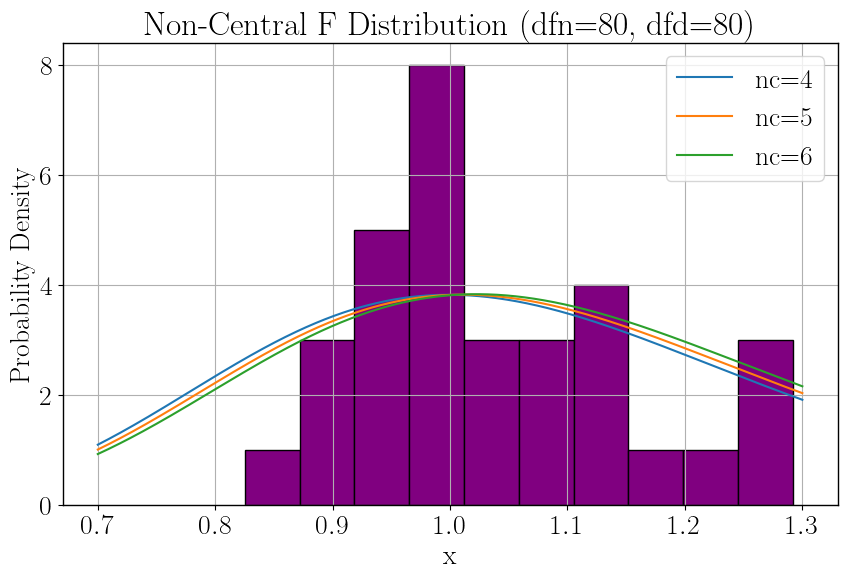

In [266]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ncf

# Parameters for the non-central F distribution
dfn = 80  # Numerator degrees of freedom
dfd = 80  # Denominator degrees of freedom
nc_values = [4, 5, 6]  # Non-centrality parameters (try different values)

# Create a range of x values for plotting the PDF
x = np.linspace(0.7, 1.3, 1000)  # Adjust range as needed for your parameters

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the PDF for each non-centrality parameter
for nc in nc_values:
    # Compute the PDF of the non-central F distribution
    pdf = ncf.pdf(x, dfn, dfd, nc)
    plt.plot(x, pdf/np.trapz(pdf, x)*32*0.05442818, label=f'nc={nc}')

    
ratios2 = a2.mean(axis=1) / b2.mean(axis=1)
a = plt.hist(ratios2, bins=10, color='purple', edgecolor='black')
# Add labels and title
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title(f'Non-Central F Distribution (dfn={dfn}, dfd={dfd})')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

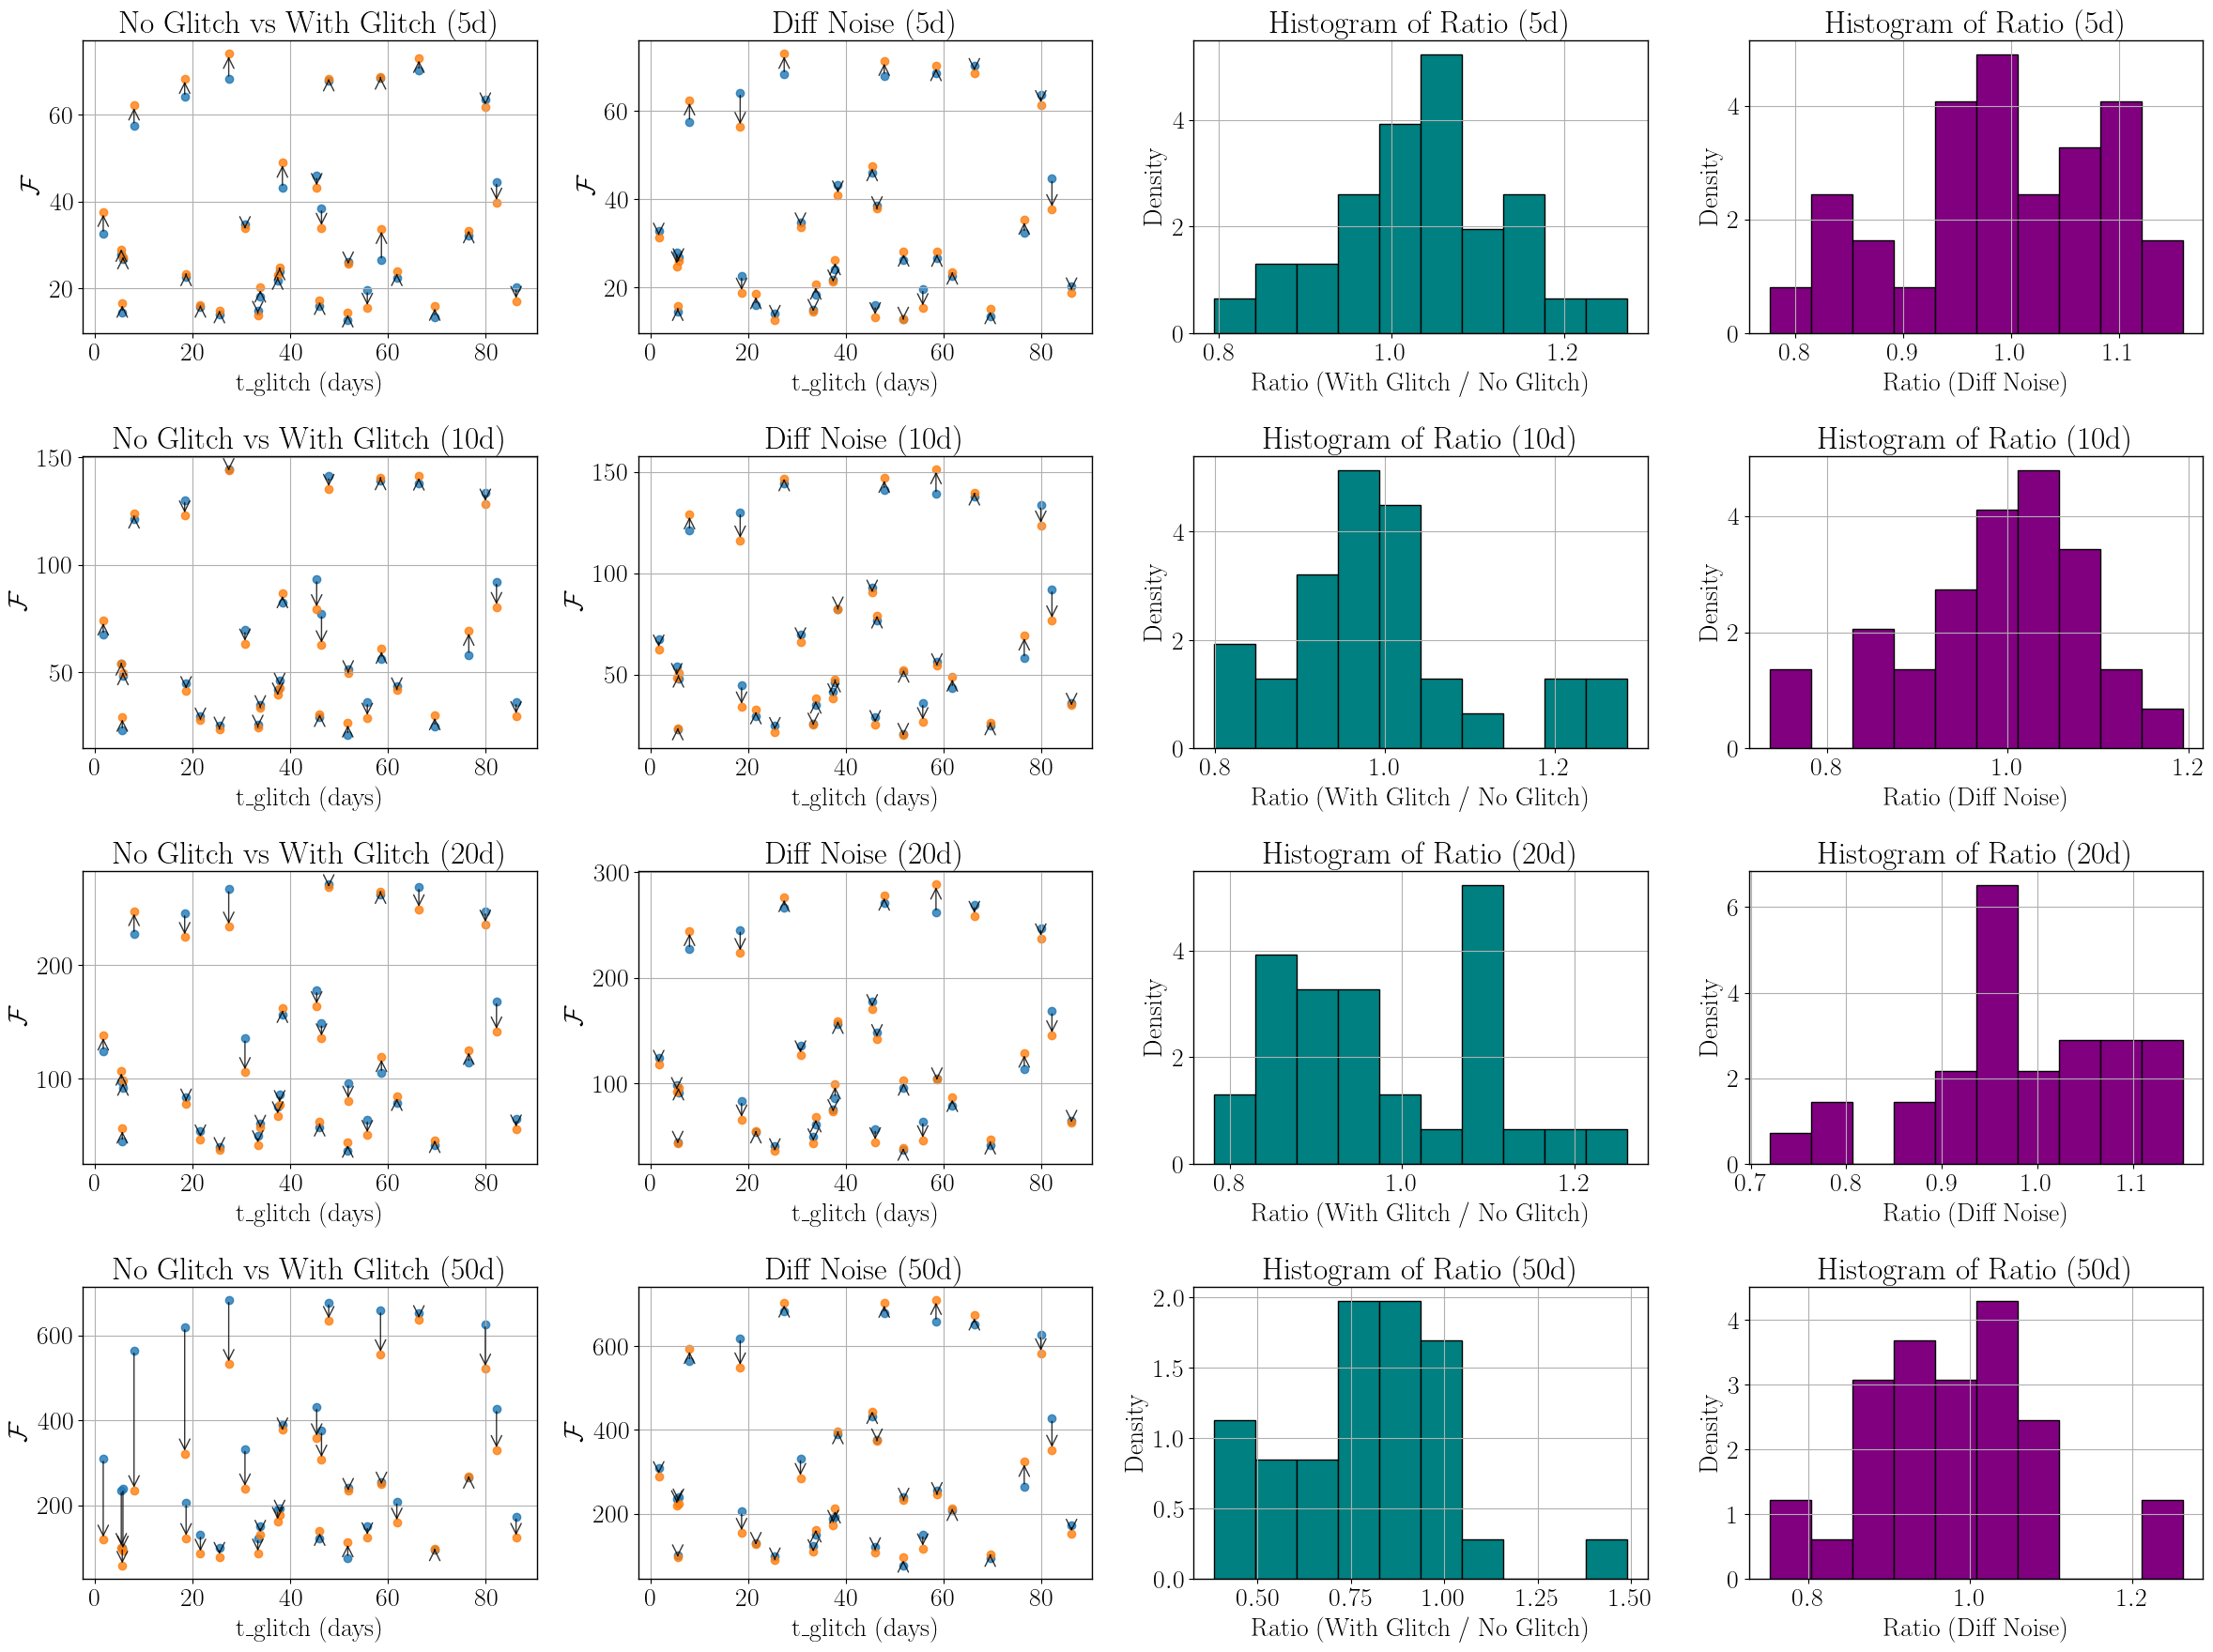

In [267]:
import pandas as pd
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Define durations
durations = ['5d', '10d', '20d', '50d']

# Initialize figure with 3x2 subplots
fig, ax = plt.subplots(4, 4, figsize=(24, 18))

# Loop over durations
for idx, duration in enumerate(durations):
    # Load the CSV file
    df = pd.read_csv(f'./data/with_glitch_onlytglitch/100-100Hz/signal_glitch_params.csv')

    # Extract parameters
    n_glitch = 1  # n glitch per signal
    f0 = df['f0'][::n_glitch].values  # size of 32
    f1 = df['f1'][::n_glitch].values
    f2 = df['f2'][::n_glitch].values
    df_p = df['df_p'].values
    df_t = df['df_t'].values
    df1_p = df['df1_p'].values
    q = df['Q'].values
    t_glitch = df['tglitch_day'].values

    # Initialize arrays
    a = np.zeros(32)  # No Glitch
    b = np.zeros(32)  # With Glitch
    c = np.zeros(32)  # No Glitch Diff Noise
    f0_list = np.zeros((32, 2))
    f1_list = np.zeros((32, 2))
    f2_list = np.zeros((32, 2))

    # Load data
    for i in range(32):
        d1 = fits.open(f'./results/{duration}/no_glitch/100-100Hz/no_glitch_CW{i}.fts')
        d2 = fits.open(f'./results/{duration}/with_glitch_onlytglitch/100-100Hz/with_glitch_onlytglitch_CW{i}.fts')
        d3 = fits.open(f'./results/{duration}/no_glitch_diffnoise/100-100Hz/no_glitch_diffnoise_CW{i}.fts')

        a[i] = d1[1].data['mean2F'][0]
        b[i] = d2[1].data['mean2F'][0]
        c[i] = d3[1].data['mean2F'][0]

        f0_list[i, 0] = d1[1].data['freq'][0]
        f1_list[i, 0] = d1[1].data['f1dot'][0]
        f2_list[i, 0] = d1[1].data['f2dot'][0]

        f0_list[i, 1] = d2[1].data['freq'][0]
        f1_list[i, 1] = d2[1].data['f1dot'][0]
        f2_list[i, 1] = d2[1].data['f2dot'][0]

    # Scatter plot: No Glitch vs With Glitch
    ax[idx, 0].scatter(t_glitch, a, label='No Glitch', alpha=0.8)
    ax[idx, 0].scatter(t_glitch, b, label='With Glitch', alpha=0.8)
    ax[idx, 0].set_xlabel('t_glitch (days)')
    ax[idx, 0].set_ylabel(r'$\mathcal{F}$')
    #ax[idx, 0].legend()
    ax[idx, 0].grid(True)
    ax[idx, 0].set_title(f'No Glitch vs With Glitch ({duration})')
    
    for i in range(0, len(t_glitch)):  # Every other point
        ax[idx, 0].annotate('', xy=(t_glitch[i], b[i]), xytext=(t_glitch[i], a[i]), 
                            arrowprops=dict(arrowstyle='->', color='k', alpha=0.8))
    
    # Scatter plot: No Glitch vs With Glitch
    ax[idx, 1].scatter(t_glitch, a, alpha=0.8)
    ax[idx, 1].scatter(t_glitch, c, alpha=0.8)
    ax[idx, 1].set_xlabel('t_glitch (days)')
    ax[idx, 1].set_ylabel(r'$\mathcal{F}$')
    #ax[idx, 1].legend(loc='upper right')
    ax[idx, 1].grid(True)
    ax[idx, 1].set_title(f'Diff Noise ({duration})')
    
    for i in range(0, len(t_glitch)):  # Every other point
        ax[idx, 1].annotate('', xy=(t_glitch[i], c[i]), xytext=(t_glitch[i], a[i]), 
                            arrowprops=dict(arrowstyle='->', color='k', alpha=0.8))

    # Histogram: Ratio (With Glitch / No Glitch)
    ratios = b / a
    ax[idx, 2].hist(ratios, bins=10, color='teal', edgecolor='black', density=True)
    ax[idx, 2].set_xlabel('Ratio (With Glitch / No Glitch)')
    ax[idx, 2].set_ylabel('Density')
    ax[idx, 2].grid(True)
    ax[idx, 2].set_title(f'Histogram of Ratio ({duration})')
    
    
    # Histogram: Ratio (Diff Noise)
    ratios = c / a
    ax[idx, 3].hist(ratios, bins=10, color='purple', edgecolor='black', density=True)
    ax[idx, 3].set_xlabel('Ratio (Diff Noise)')
    ax[idx, 3].set_ylabel('Density')
    ax[idx, 3].grid(True)
    ax[idx, 3].set_title(f'Histogram of Ratio ({duration})')

# Adjust layout
plt.tight_layout()
plt.show()

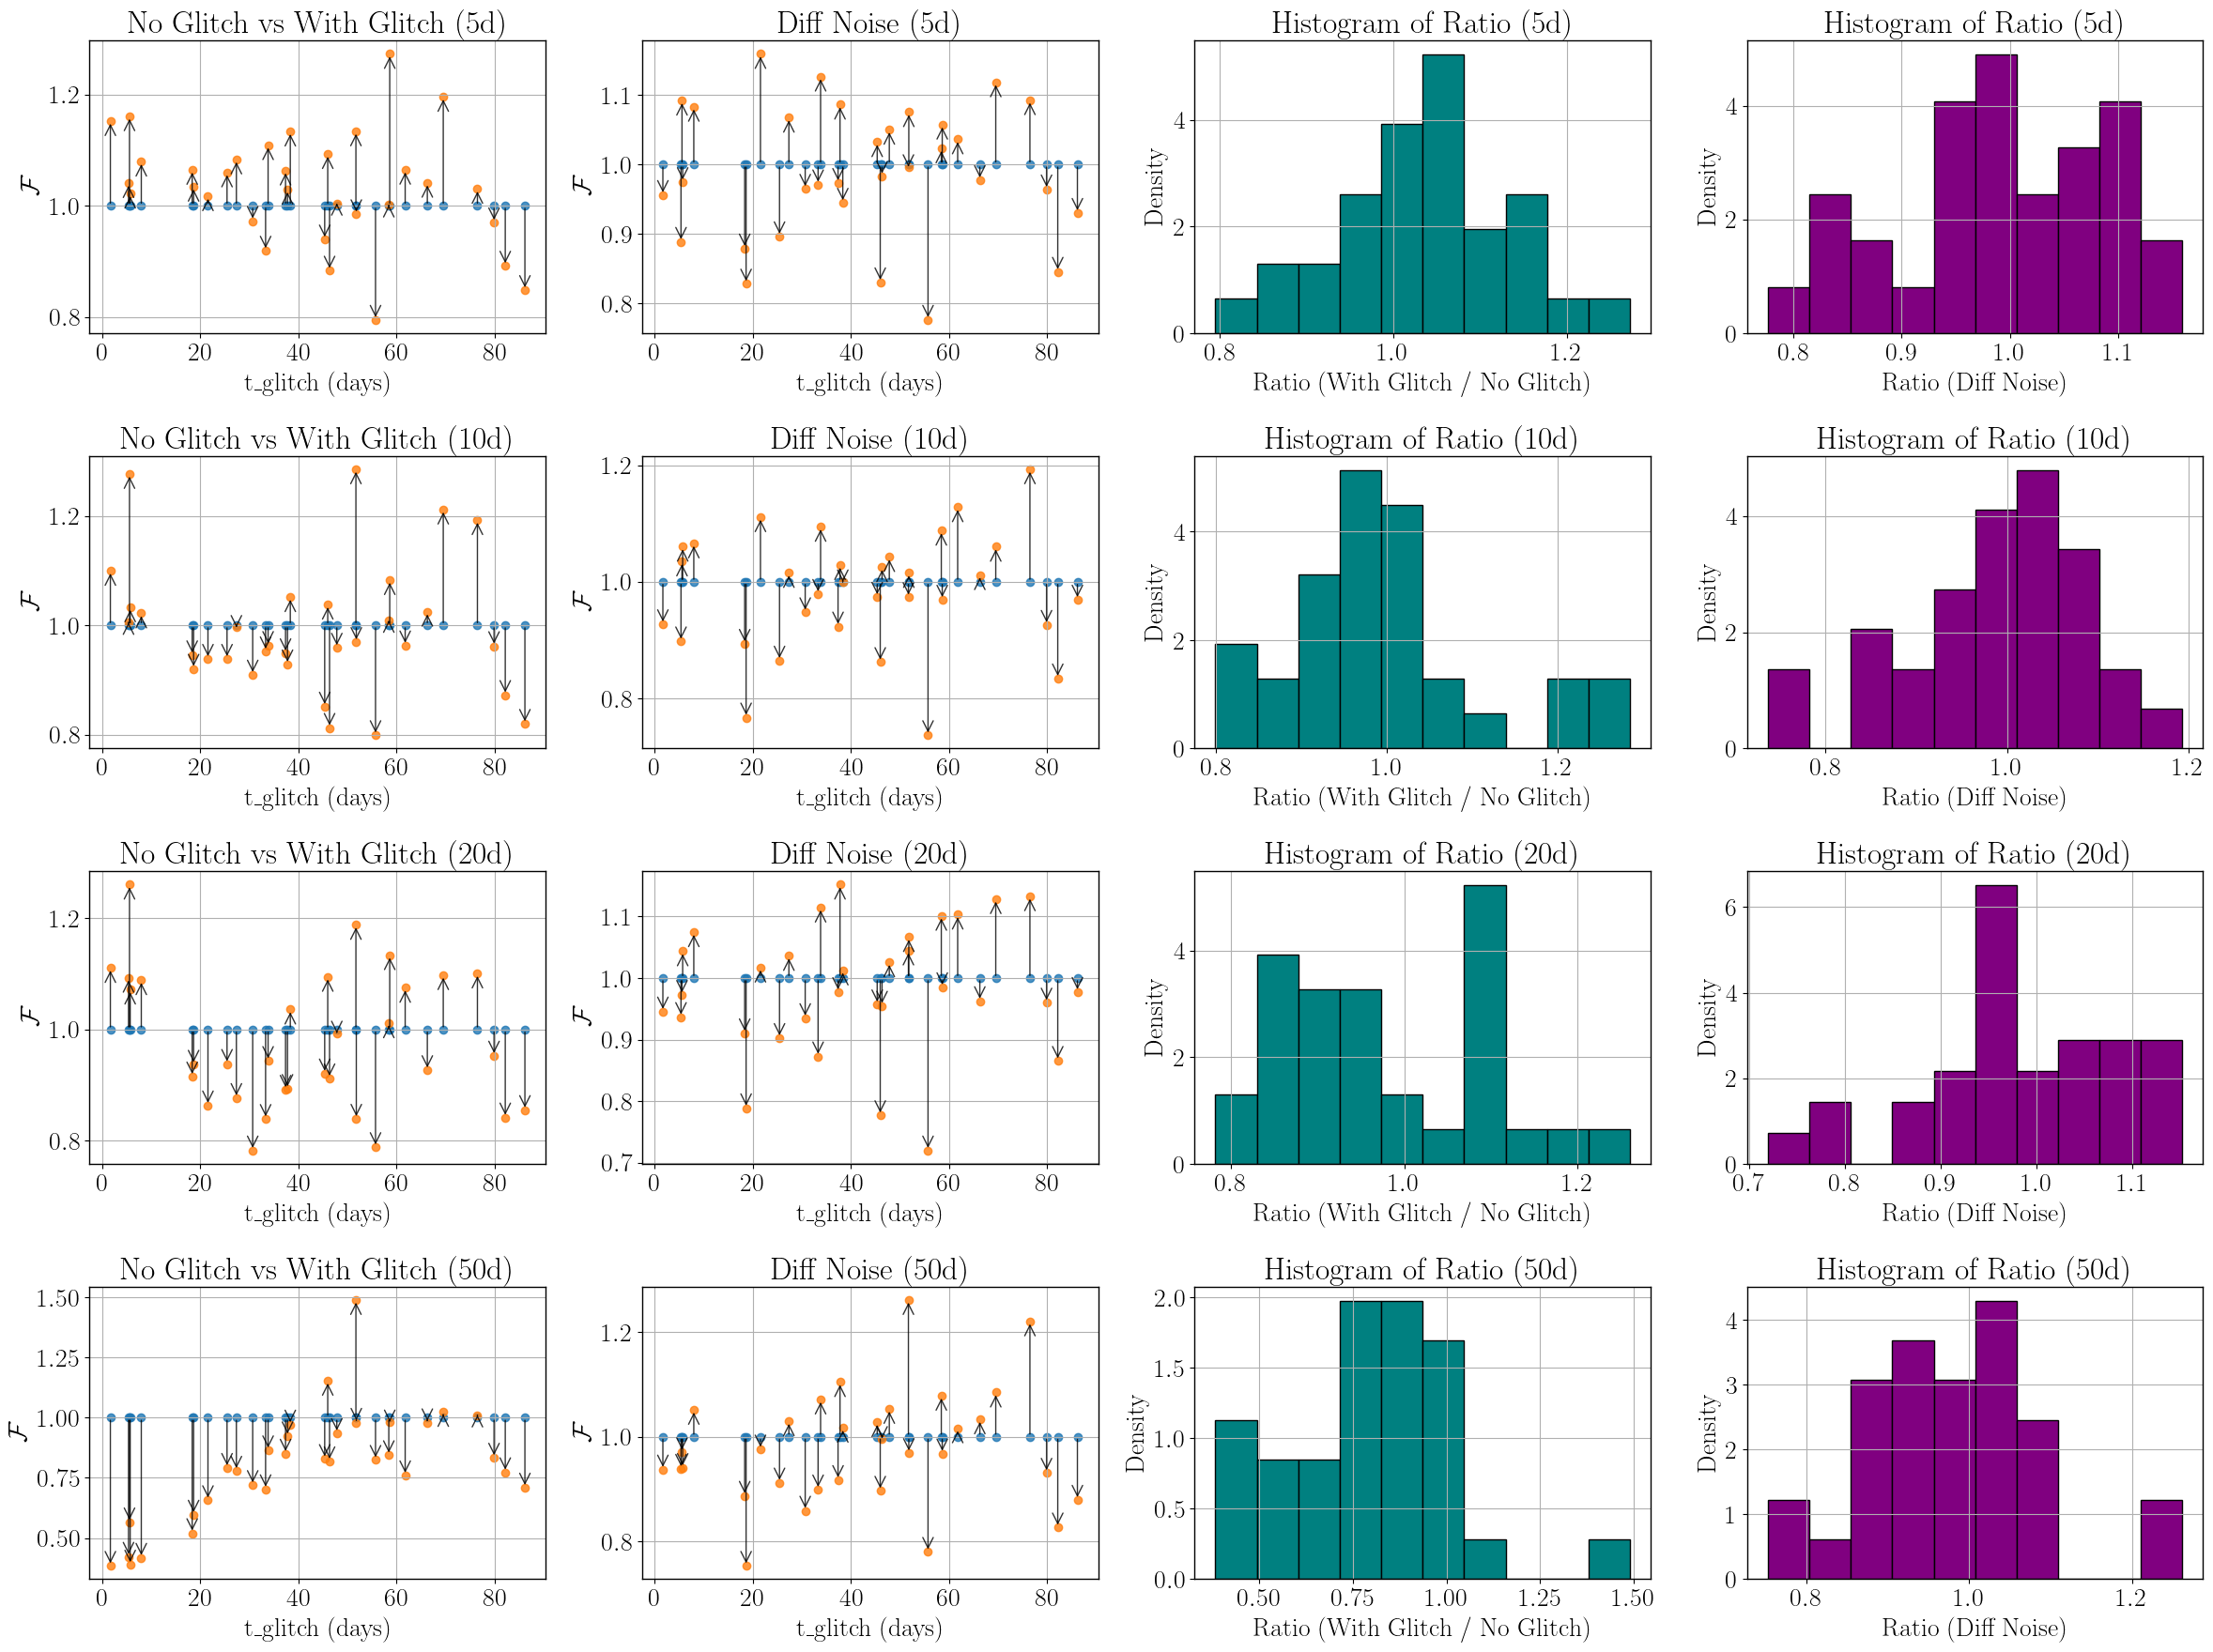

In [279]:
import pandas as pd
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Define durations
durations = ['5d', '10d', '20d', '50d']

# Initialize figure with 3x2 subplots
fig, ax = plt.subplots(4, 4, figsize=(24, 18))

# Loop over durations
for idx, duration in enumerate(durations):
    # Load the CSV file
    df = pd.read_csv(f'./data/with_glitch_onlytglitch/100-100Hz/signal_glitch_params.csv')

    # Extract parameters
    n_glitch = 1  # n glitch per signal
    f0 = df['f0'][::n_glitch].values  # size of 32
    f1 = df['f1'][::n_glitch].values
    f2 = df['f2'][::n_glitch].values
    df_p = df['df_p'].values
    df_t = df['df_t'].values
    df1_p = df['df1_p'].values
    q = df['Q'].values
    t_glitch = df['tglitch_day'].values

    # Initialize arrays
    a = np.zeros(32)  # No Glitch
    b = np.zeros(32)  # With Glitch
    c = np.zeros(32)  # No Glitch Diff Noise
    f0_list = np.zeros((32, 2))
    f1_list = np.zeros((32, 2))
    f2_list = np.zeros((32, 2))

    # Load data
    for i in range(32):
        d1 = fits.open(f'./results/{duration}/no_glitch/100-100Hz/no_glitch_CW{i}.fts')
        d2 = fits.open(f'./results/{duration}/with_glitch_onlytglitch/100-100Hz/with_glitch_onlytglitch_CW{i}.fts')
        d3 = fits.open(f'./results/{duration}/no_glitch_diffnoise/100-100Hz/no_glitch_diffnoise_CW{i}.fts')

        a[i] = d1[1].data['mean2F'][0]
        b[i] = d2[1].data['mean2F'][0]
        c[i] = d3[1].data['mean2F'][0]

        f0_list[i, 0] = d1[1].data['freq'][0]
        f1_list[i, 0] = d1[1].data['f1dot'][0]
        f2_list[i, 0] = d1[1].data['f2dot'][0]

        f0_list[i, 1] = d2[1].data['freq'][0]
        f1_list[i, 1] = d2[1].data['f1dot'][0]
        f2_list[i, 1] = d2[1].data['f2dot'][0]

    # Scatter plot: No Glitch vs With Glitch
    ax[idx, 0].scatter(t_glitch, a/a, label='No Glitch', alpha=0.8)
    ax[idx, 0].scatter(t_glitch, b/a, label='With Glitch', alpha=0.8)
    ax[idx, 0].set_xlabel('t_glitch (days)')
    ax[idx, 0].set_ylabel(r'$\mathcal{F}$')
    #ax[idx, 0].legend()
    ax[idx, 0].grid(True)
    ax[idx, 0].set_title(f'No Glitch vs With Glitch ({duration})')
    
    for i in range(0, len(t_glitch)):  # Every other point
        ax[idx, 0].annotate('', xy=(t_glitch[i], b[i]/a[i]), xytext=(t_glitch[i], a[i]/a[i]), 
                            arrowprops=dict(arrowstyle='->', color='k', alpha=0.8))
    
    # Scatter plot: No Glitch vs With Glitch
    ax[idx, 1].scatter(t_glitch, a/a, alpha=0.8)
    ax[idx, 1].scatter(t_glitch, c/a, alpha=0.8)
    ax[idx, 1].set_xlabel('t_glitch (days)')
    ax[idx, 1].set_ylabel(r'$\mathcal{F}$')
    #ax[idx, 1].legend(loc='upper right')
    ax[idx, 1].grid(True)
    ax[idx, 1].set_title(f'Diff Noise ({duration})')
    
    for i in range(0, len(t_glitch)):  # Every other point
        ax[idx, 1].annotate('', xy=(t_glitch[i], c[i]/a[i]), xytext=(t_glitch[i], a[i]/a[i]), 
                            arrowprops=dict(arrowstyle='->', color='k', alpha=0.8))

    # Histogram: Ratio (With Glitch / No Glitch)
    ratios = b / a
    ax[idx, 2].hist(ratios, bins=10, color='teal', edgecolor='black', density=True)
    ax[idx, 2].set_xlabel('Ratio (With Glitch / No Glitch)')
    ax[idx, 2].set_ylabel('Density')
    ax[idx, 2].grid(True)
    ax[idx, 2].set_title(f'Histogram of Ratio ({duration})')
    
    
    # Histogram: Ratio (Diff Noise)
    ratios = c / a
    ax[idx, 3].hist(ratios, bins=10, color='purple', edgecolor='black', density=True)
    ax[idx, 3].set_xlabel('Ratio (Diff Noise)')
    ax[idx, 3].set_ylabel('Density')
    ax[idx, 3].grid(True)
    ax[idx, 3].set_title(f'Histogram of Ratio ({duration})')

# Adjust layout
plt.tight_layout()
plt.show()

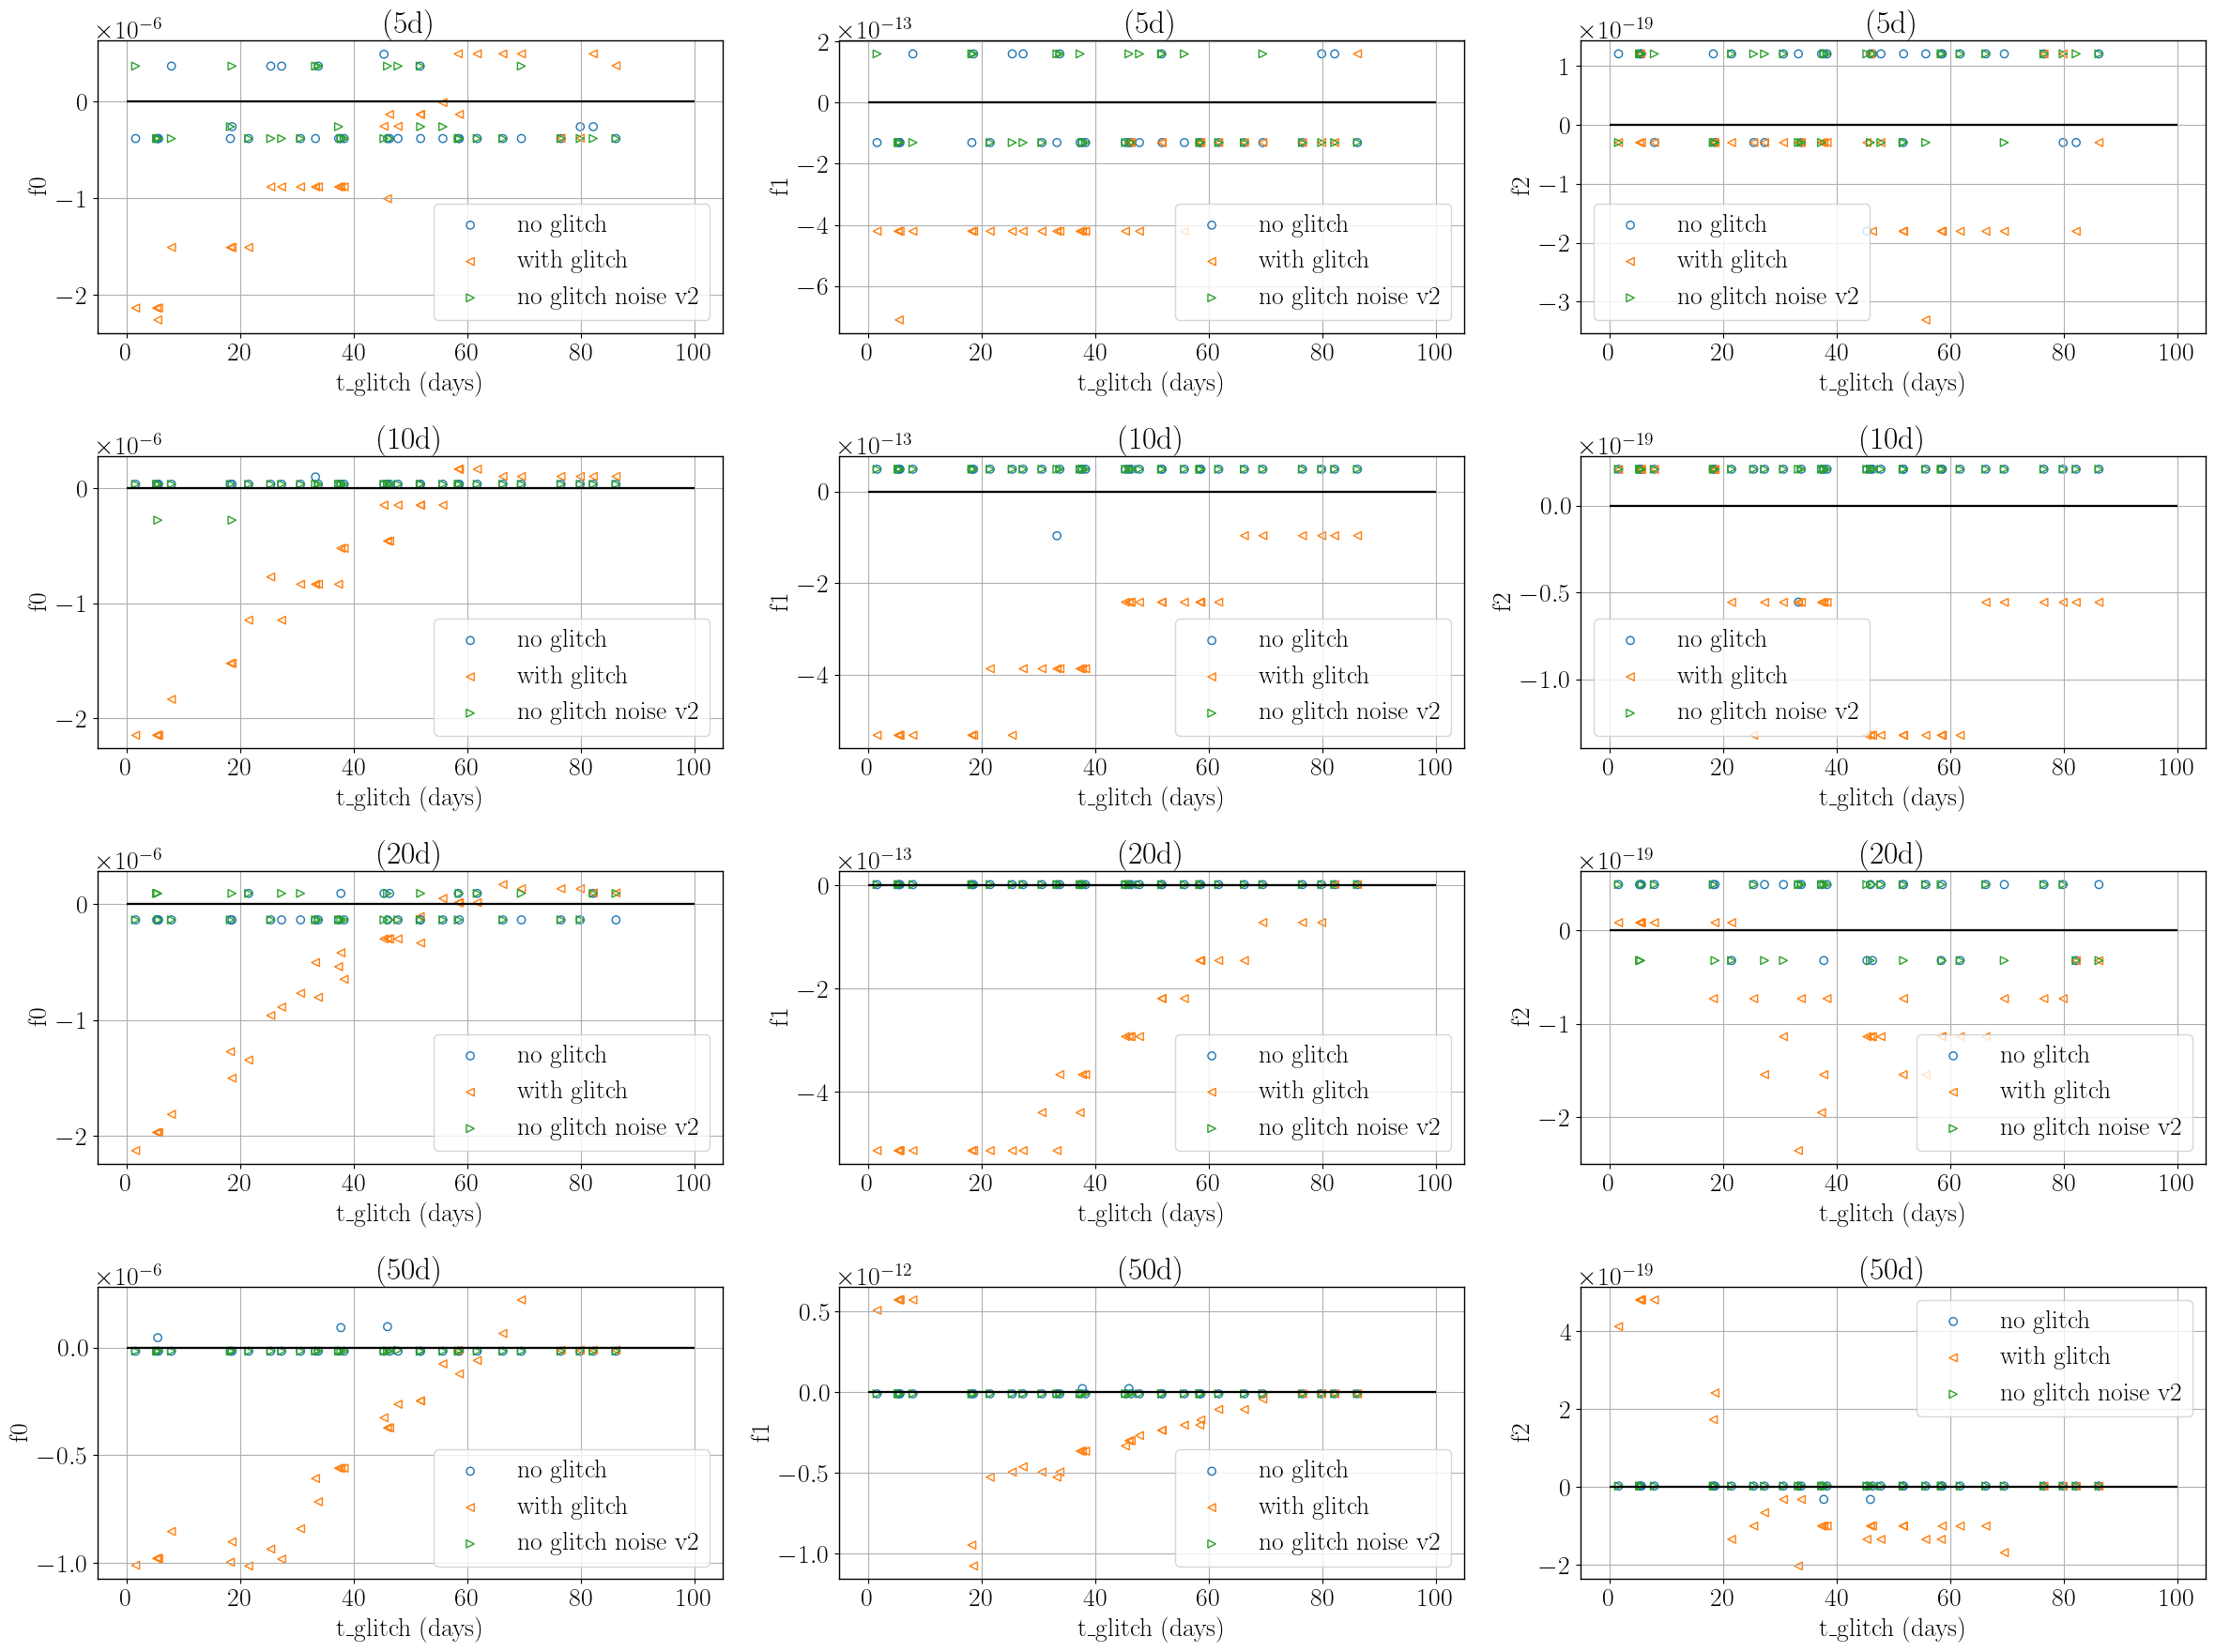

In [272]:
# Load the CSV file
df = pd.read_csv(f'./data/with_glitch_onlytglitch/100-100Hz/signal_glitch_params.csv')

# Extract parameters
n_glitch = 1  # n glitch per signal
f0 = df['f0'][::n_glitch].values  # size of 32
f1 = df['f1'][::n_glitch].values
f2 = df['f2'][::n_glitch].values
df_p = df['df_p'].values
df_t = df['df_t'].values
df1_p = df['df1_p'].values
q = df['Q'].values
t_glitch = df['tglitch_day'].values

# Define durations
durations = ['5d', '10d', '20d', '50d']
marker = ['o', '<', '>']
labels = ['no glitch', 'with glitch', 'no glitch noise v2']
# Initialize figure with 3x2 subplots
fig, ax = plt.subplots(4, 3, figsize=(24, 18))

# Loop over durations
for idx, duration in enumerate(durations):

    f0_list = np.zeros((32, 3))
    f1_list = np.zeros((32, 3))
    f2_list = np.zeros((32, 3))

    # Load data
    for i in range(32):
        d1 = fits.open(f'./results/{duration}/no_glitch/100-100Hz/no_glitch_CW{i}.fts')
        d2 = fits.open(f'./results/{duration}/with_glitch_onlytglitch/100-100Hz/with_glitch_onlytglitch_CW{i}.fts')
        d3 = fits.open(f'./results/{duration}/no_glitch_diffnoise/100-100Hz/no_glitch_diffnoise_CW{i}.fts')

        f0_list[i, 0] = d1[1].data['freq'][0]
        f1_list[i, 0] = d1[1].data['f1dot'][0]
        f2_list[i, 0] = d1[1].data['f2dot'][0]

        f0_list[i, 1] = d2[1].data['freq'][0]
        f1_list[i, 1] = d2[1].data['f1dot'][0]
        f2_list[i, 1] = d2[1].data['f2dot'][0]
        
        f0_list[i, 2] = d3[1].data['freq'][0]
        f1_list[i, 2] = d3[1].data['f1dot'][0]
        f2_list[i, 2] = d3[1].data['f2dot'][0]

    data = [f0_list, f1_list, f2_list]
    truth = [f0, f1, f2]
    for plot_i in range(3):
        for j in range(3):
            # Scatter plot: No Glitch vs With Glitch
            ax[idx, plot_i].scatter(t_glitch, (data[plot_i][:, j]-truth[plot_i]), color=colors[j], label=labels[j], marker=marker[j], facecolors='none')
            ax[idx, plot_i].hlines([0], 0, 100, color ="k")
    #        ax[idx, i].scatter(t_glitch, b, label='With Glitch', alpha=0.8)
            ax[idx, plot_i].set_xlabel('t_glitch (days)')
            ax[idx, plot_i].set_ylabel(f'f{plot_i}')
            ax[idx, plot_i].legend()
            ax[idx, plot_i].grid(True)
            ax[idx, plot_i].set_title(f'({duration})')

# Adjust layout
plt.tight_layout()
plt.show()

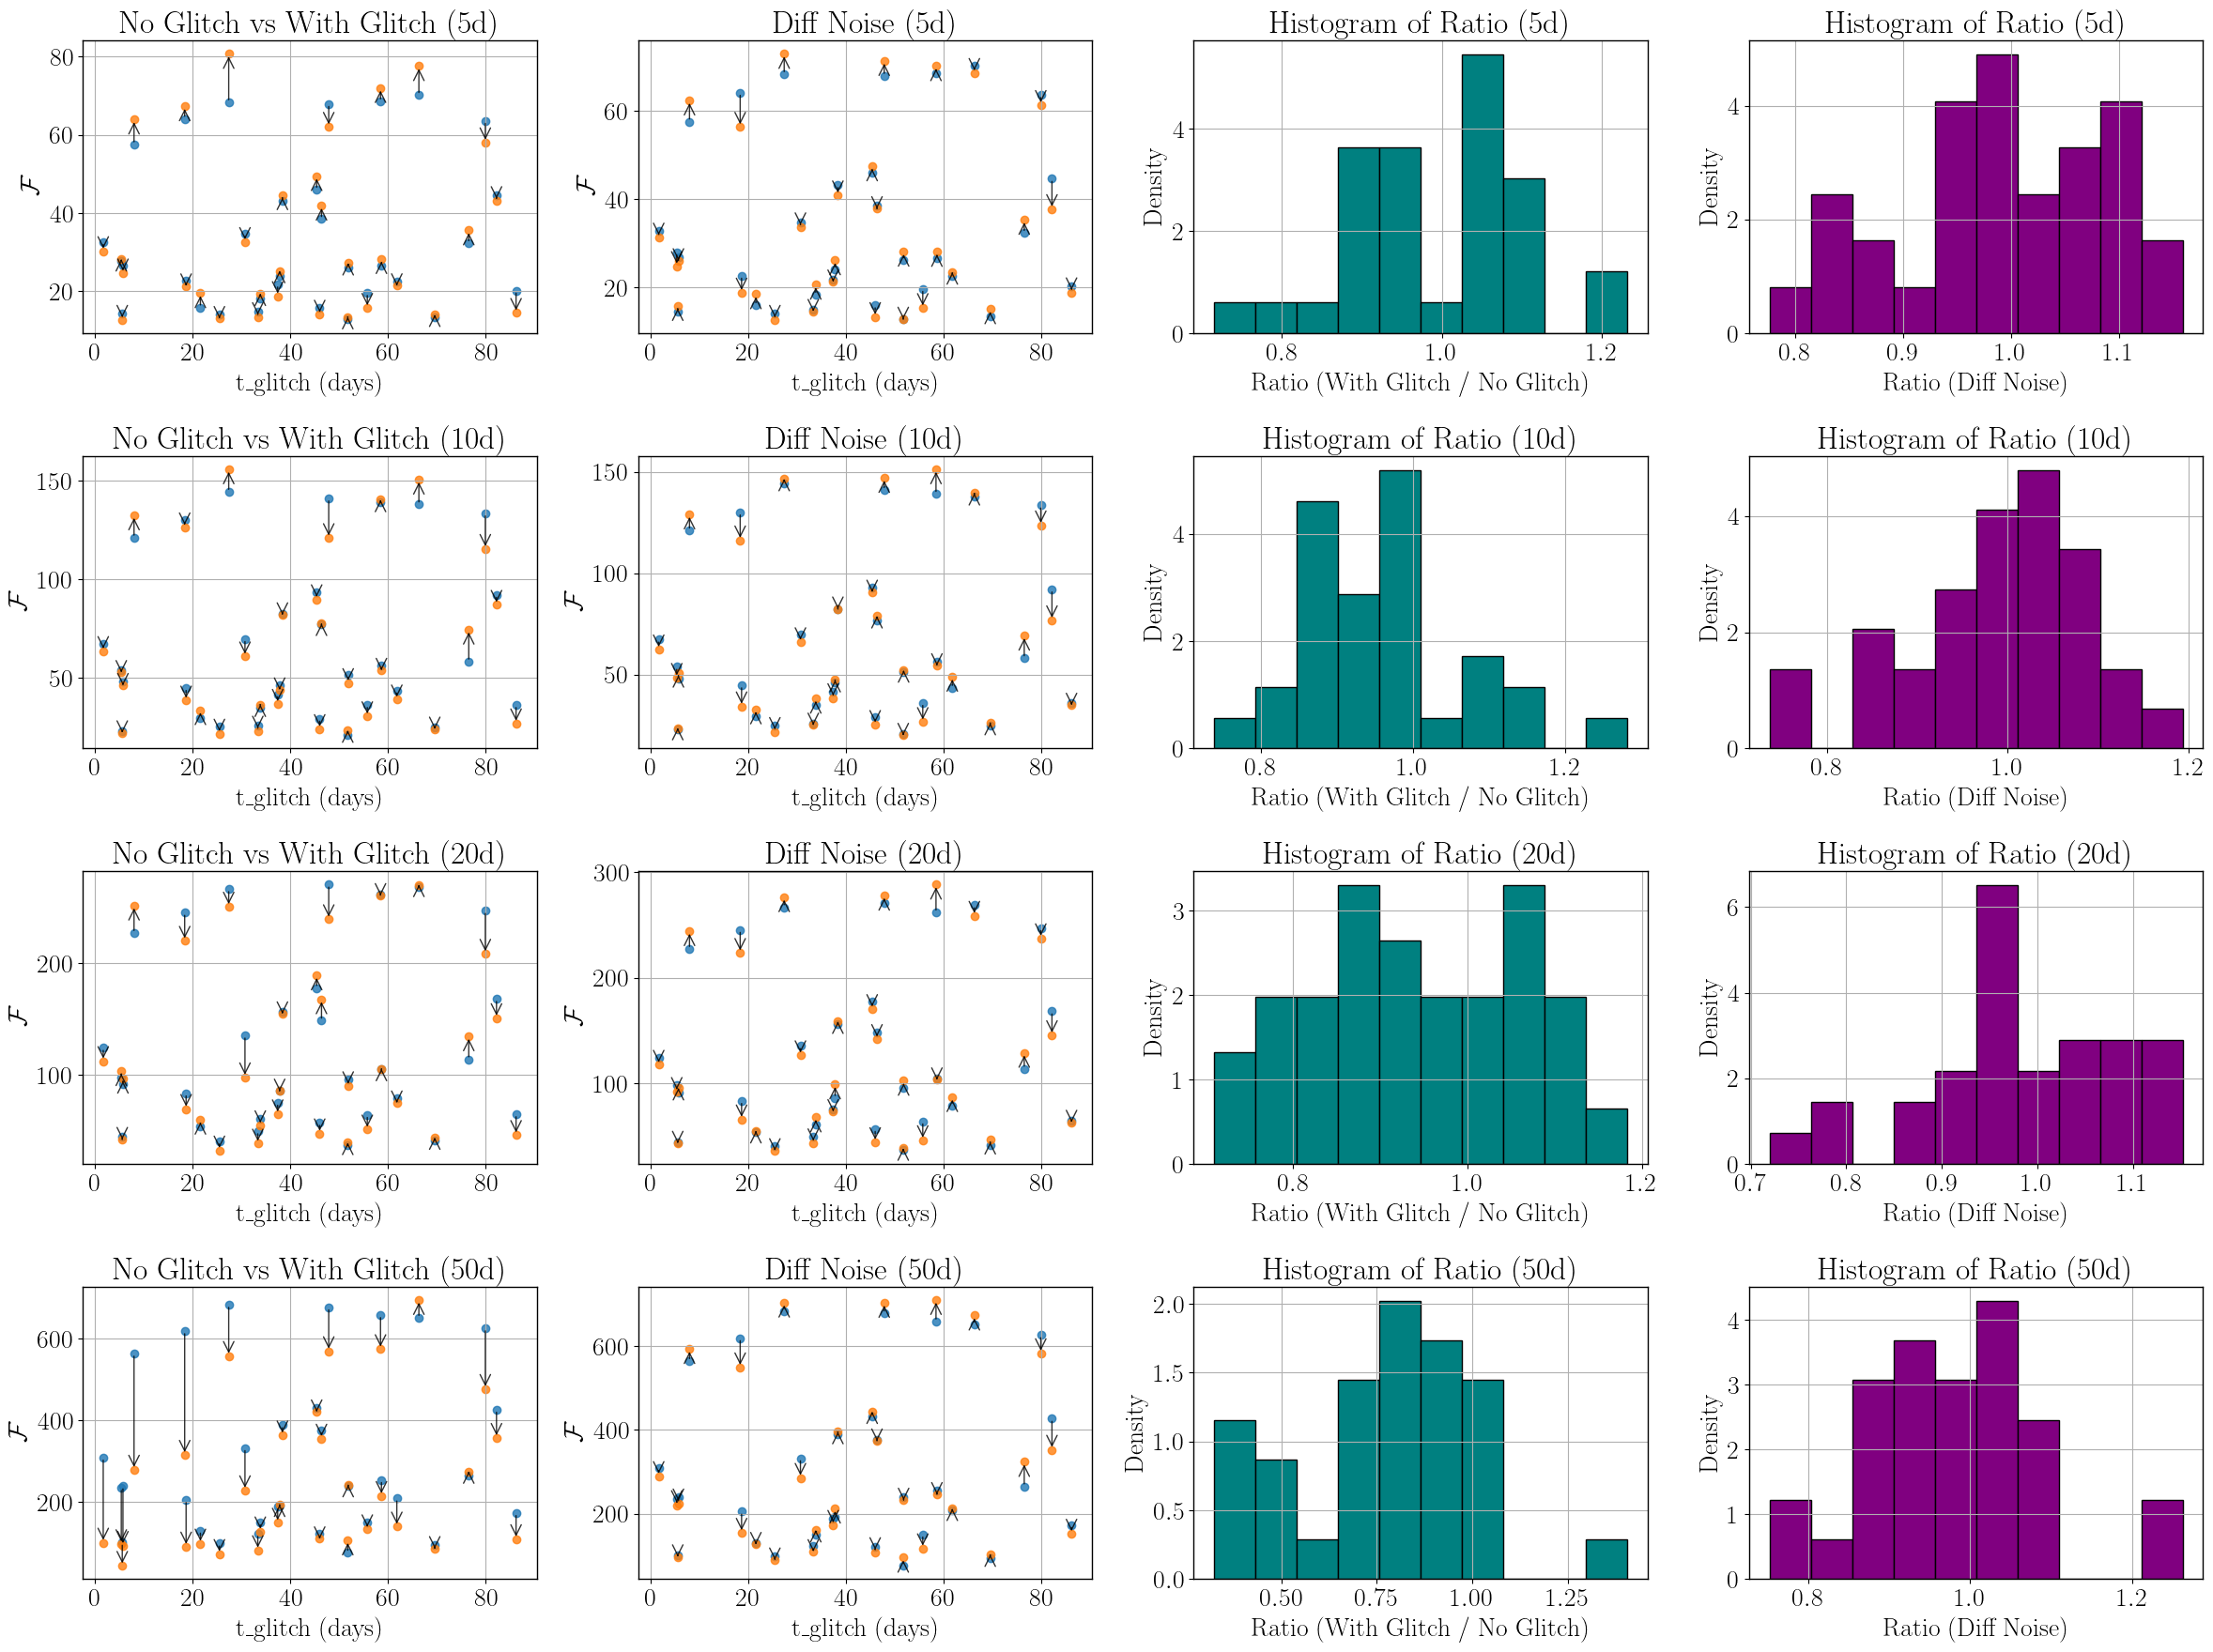

In [268]:
import pandas as pd
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv(f'./data/with_glitch_onlytglitch/100-100Hz/signal_glitch_params.csv')

# Extract parameters
n_glitch = 1  # n glitch per signal
f0 = df['f0'][::n_glitch].values  # size of 32
f1 = df['f1'][::n_glitch].values
f2 = df['f2'][::n_glitch].values
df_p = df['df_p'].values
df_t = df['df_t'].values
df1_p = df['df1_p'].values
q = df['Q'].values
t_glitch = df['tglitch_day'].values

# Define durations
durations = ['5d', '10d', '20d', '50d']

# Initialize figure with 3x2 subplots
fig, ax = plt.subplots(4, 4, figsize=(24, 18))

# Loop over durations
for idx, duration in enumerate(durations):

    # Initialize arrays
    a = np.zeros(32)  # No Glitch
    b = np.zeros(32)  # With Glitch
    c = np.zeros(32)  # No Glitch Diff Noise

    # Load data
    for i in range(32):
        d1 = fits.open(f'./results/{duration}/no_glitch/100-100Hz/no_glitch_CW{i}.fts')
        d2 = fits.open(f'./results/{duration}/with_glitch_onlytglitch_consth0/100-100Hz/with_glitch_onlytglitch_consth0_CW{i}.fts')
        d3 = fits.open(f'./results/{duration}/no_glitch_diffnoise/100-100Hz/no_glitch_diffnoise_CW{i}.fts')

        a[i] = d1[1].data['mean2F'][0]
        b[i] = d2[1].data['mean2F'][0]
        c[i] = d3[1].data['mean2F'][0]

    # Scatter plot: No Glitch vs With Glitch
    ax[idx, 0].scatter(t_glitch, a, label='No Glitch', alpha=0.8)
    ax[idx, 0].scatter(t_glitch, b, label='With Glitch', alpha=0.8)
    ax[idx, 0].set_xlabel('t_glitch (days)')
    ax[idx, 0].set_ylabel(r'$\mathcal{F}$')
    #ax[idx, 0].legend()
    ax[idx, 0].grid(True)
    ax[idx, 0].set_title(f'No Glitch vs With Glitch ({duration})')
    
    for i in range(0, len(t_glitch)):  # Every other point
        ax[idx, 0].annotate('', xy=(t_glitch[i], b[i]), xytext=(t_glitch[i], a[i]), 
                            arrowprops=dict(arrowstyle='->', color='k', alpha=0.8))
    
    # Scatter plot: No Glitch vs With Glitch
    ax[idx, 1].scatter(t_glitch, a, alpha=0.8)
    ax[idx, 1].scatter(t_glitch, c, alpha=0.8)
    ax[idx, 1].set_xlabel('t_glitch (days)')
    ax[idx, 1].set_ylabel(r'$\mathcal{F}$')
    #ax[idx, 1].legend(loc='upper right')
    ax[idx, 1].grid(True)
    ax[idx, 1].set_title(f'Diff Noise ({duration})')
    
    for i in range(0, len(t_glitch)):  # Every other point
        ax[idx, 1].annotate('', xy=(t_glitch[i], c[i]), xytext=(t_glitch[i], a[i]), 
                            arrowprops=dict(arrowstyle='->', color='k', alpha=0.8))

    # Histogram: Ratio (With Glitch / No Glitch)
    ratios = b / a
    ax[idx, 2].hist(ratios, bins=10, color='teal', edgecolor='black', density=True)
    ax[idx, 2].set_xlabel('Ratio (With Glitch / No Glitch)')
    ax[idx, 2].set_ylabel('Density')
    ax[idx, 2].grid(True)
    ax[idx, 2].set_title(f'Histogram of Ratio ({duration})')
    
    
    # Histogram: Ratio (Diff Noise)
    ratios = c / a
    ax[idx, 3].hist(ratios, bins=10, color='purple', edgecolor='black', density=True)
    ax[idx, 3].set_xlabel('Ratio (Diff Noise)')
    ax[idx, 3].set_ylabel('Density')
    ax[idx, 3].grid(True)
    ax[idx, 3].set_title(f'Histogram of Ratio ({duration})')

# Adjust layout
plt.tight_layout()
plt.show()

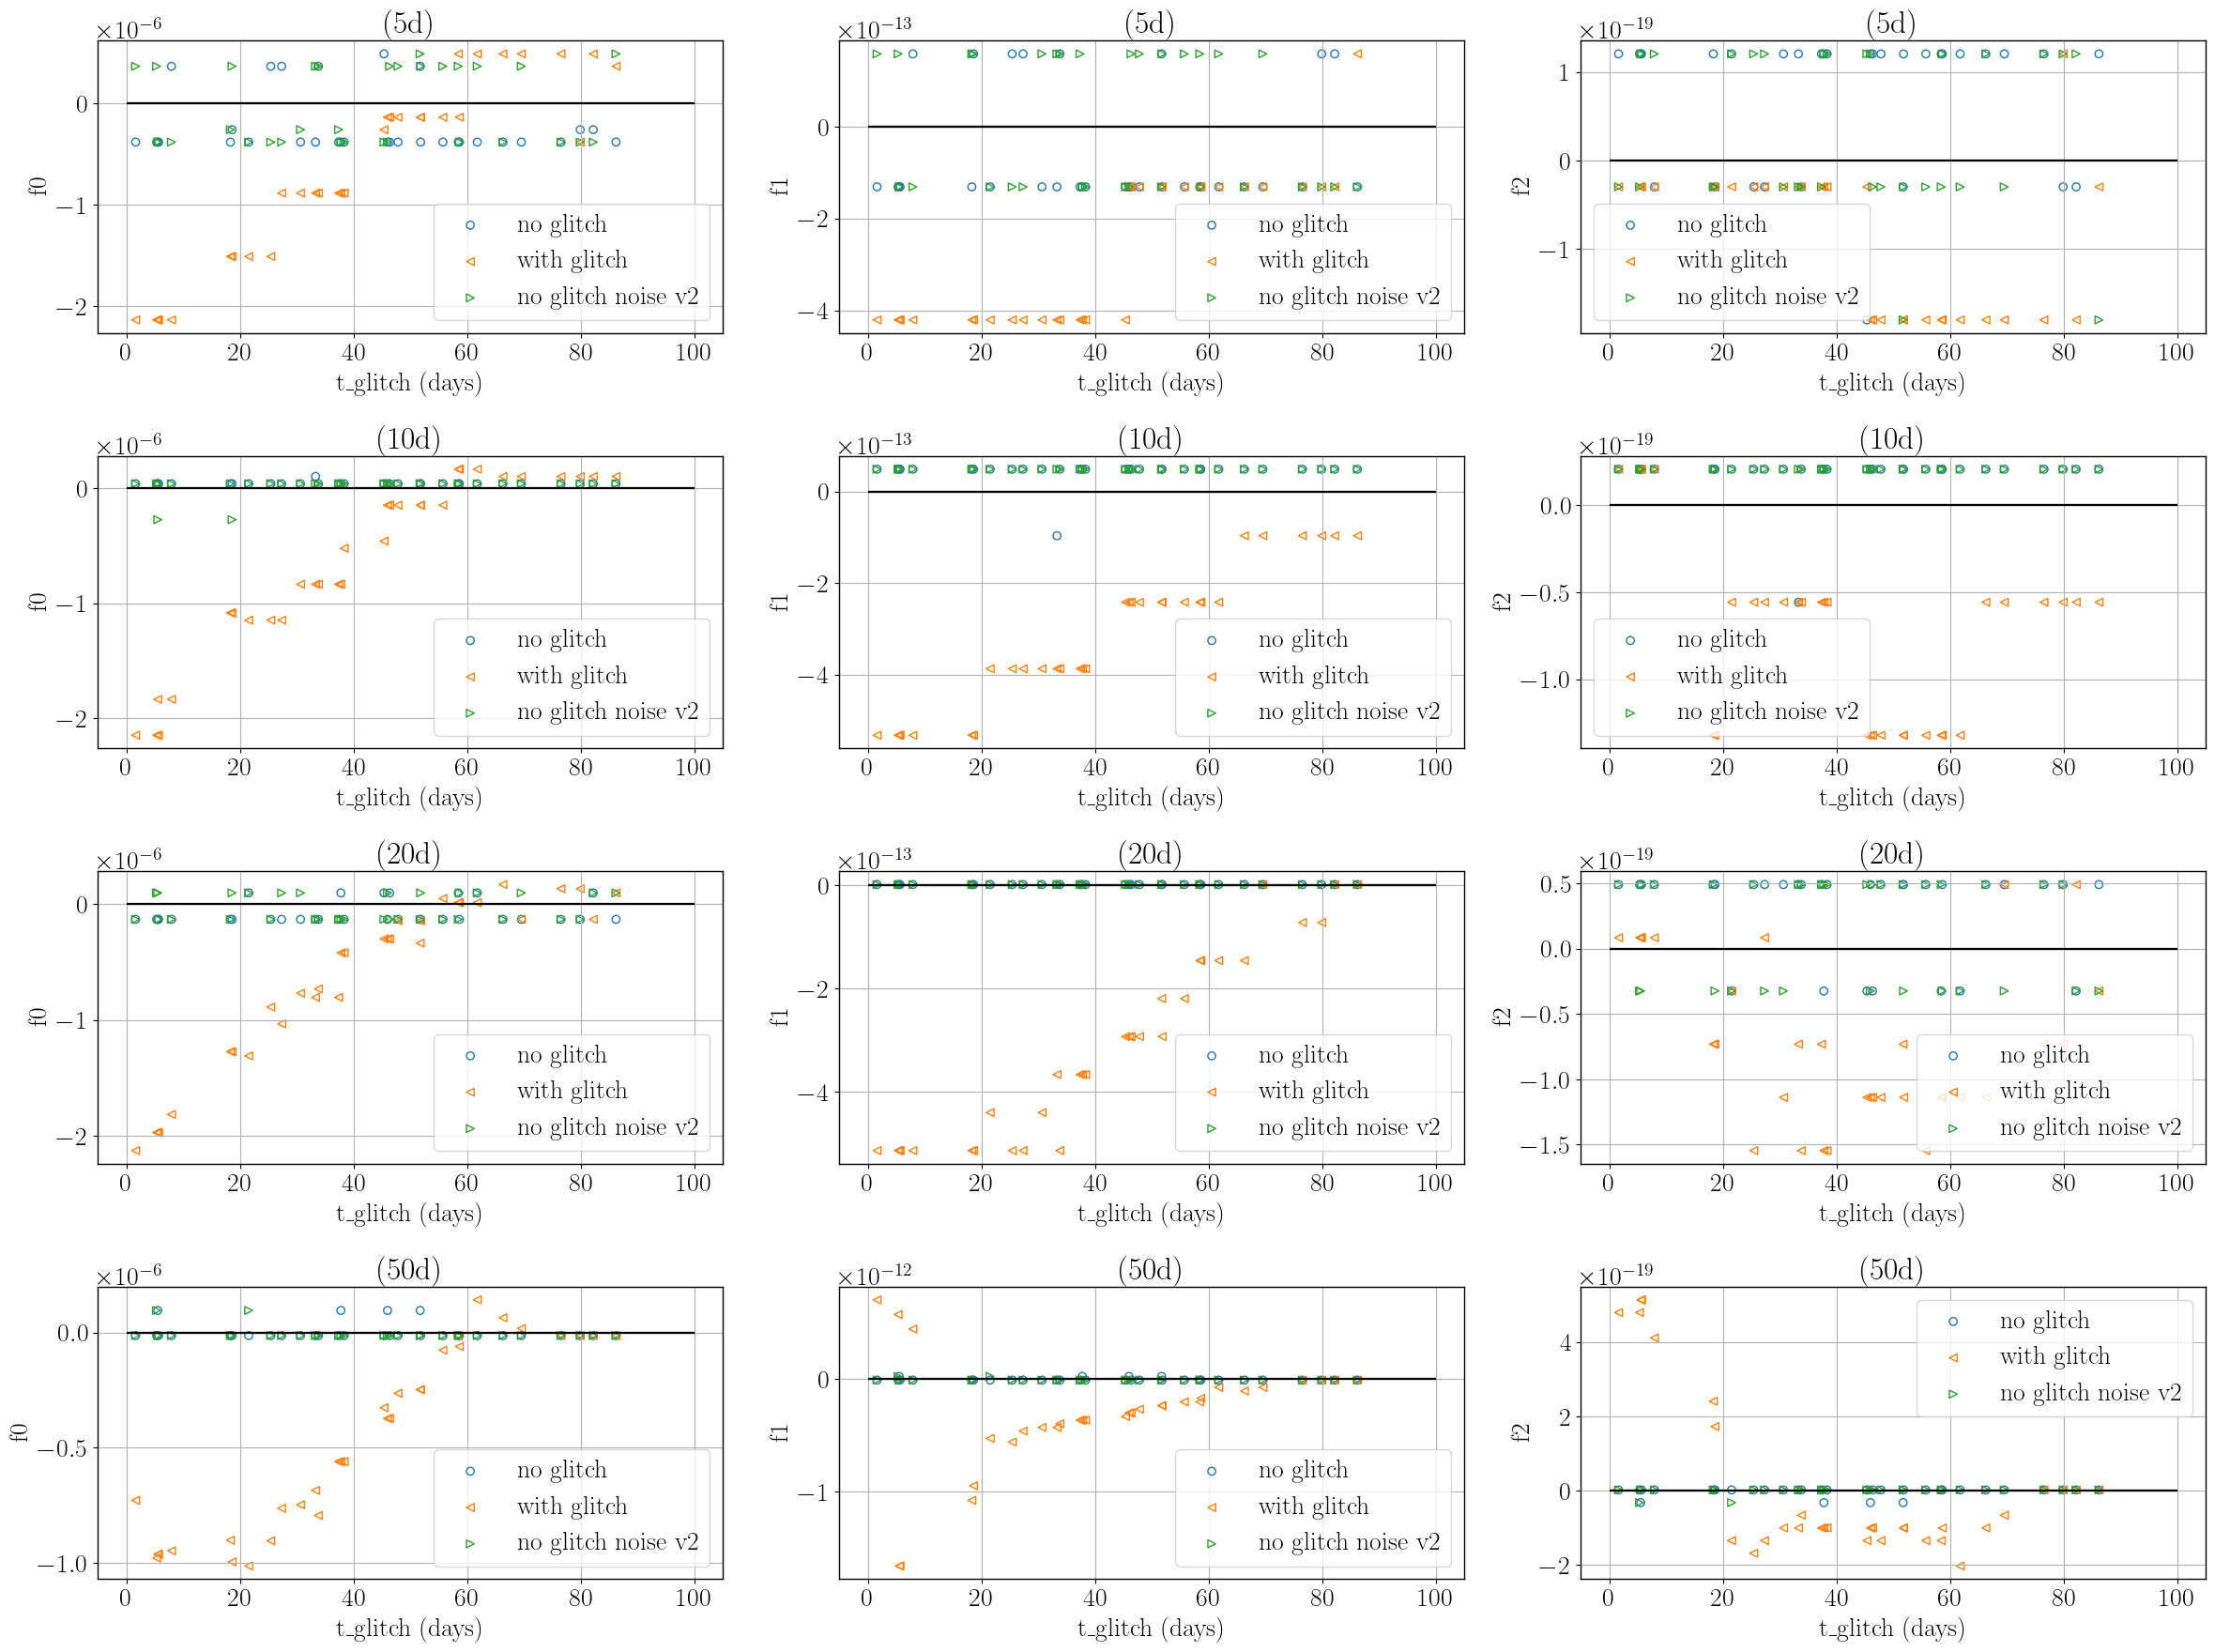

In [213]:
# Load the CSV file
df = pd.read_csv(f'./data/with_glitch_onlytglitch_consth0/100-100Hz/signal_glitch_params.csv')

# Extract parameters
n_glitch = 1  # n glitch per signal
f0 = df['f0'][::n_glitch].values  # size of 32
f1 = df['f1'][::n_glitch].values
f2 = df['f2'][::n_glitch].values
df_p = df['df_p'].values
df_t = df['df_t'].values
df1_p = df['df1_p'].values
q = df['Q'].values
t_glitch = df['tglitch_day'].values

# Define durations
durations = ['5d', '10d', '20d', '50d']
marker = ['o', '<', '>']
labels = ['no glitch', 'with glitch', 'no glitch noise v2']
# Initialize figure with 3x2 subplots
fig, ax = plt.subplots(4, 3, figsize=(24, 18))

# Loop over durations
for idx, duration in enumerate(durations):

    f0_list = np.zeros((32, 3))
    f1_list = np.zeros((32, 3))
    f2_list = np.zeros((32, 3))

    # Load data
    for i in range(32):
        d1 = fits.open(f'./results/{duration}/no_glitch/100-100Hz/no_glitch_CW{i}.fts')
        d2 = fits.open(f'./results/{duration}/with_glitch_onlytglitch_consth0/100-100Hz/with_glitch_onlytglitch_consth0_CW{i}.fts')
        d3 = fits.open(f'./results/{duration}/no_glitch_diffnoise/100-100Hz/no_glitch_diffnoise_CW{i}.fts')

        f0_list[i, 0] = d1[1].data['freq'][0]
        f1_list[i, 0] = d1[1].data['f1dot'][0]
        f2_list[i, 0] = d1[1].data['f2dot'][0]

        f0_list[i, 1] = d2[1].data['freq'][0]
        f1_list[i, 1] = d2[1].data['f1dot'][0]
        f2_list[i, 1] = d2[1].data['f2dot'][0]
        
        f0_list[i, 2] = d3[1].data['freq'][0]
        f1_list[i, 2] = d3[1].data['f1dot'][0]
        f2_list[i, 2] = d3[1].data['f2dot'][0]

    data = [f0_list, f1_list, f2_list]
    truth = [f0, f1, f2]
    for plot_i in range(3):
        for j in range(3):
            # Scatter plot: No Glitch vs With Glitch
            ax[idx, plot_i].scatter(t_glitch, (data[plot_i][:, j]-truth[plot_i]), color=colors[j], label=labels[j], marker=marker[j], facecolors='none')
            ax[idx, plot_i].hlines([0], 0, 100, color ="k")
    #        ax[idx, i].scatter(t_glitch, b, label='With Glitch', alpha=0.8)
            ax[idx, plot_i].set_xlabel('t_glitch (days)')
            ax[idx, plot_i].set_ylabel(f'f{plot_i}')
            ax[idx, plot_i].legend()
            ax[idx, plot_i].grid(True)
            ax[idx, plot_i].set_title(f'({duration})')

# Adjust layout
plt.tight_layout()
plt.show()

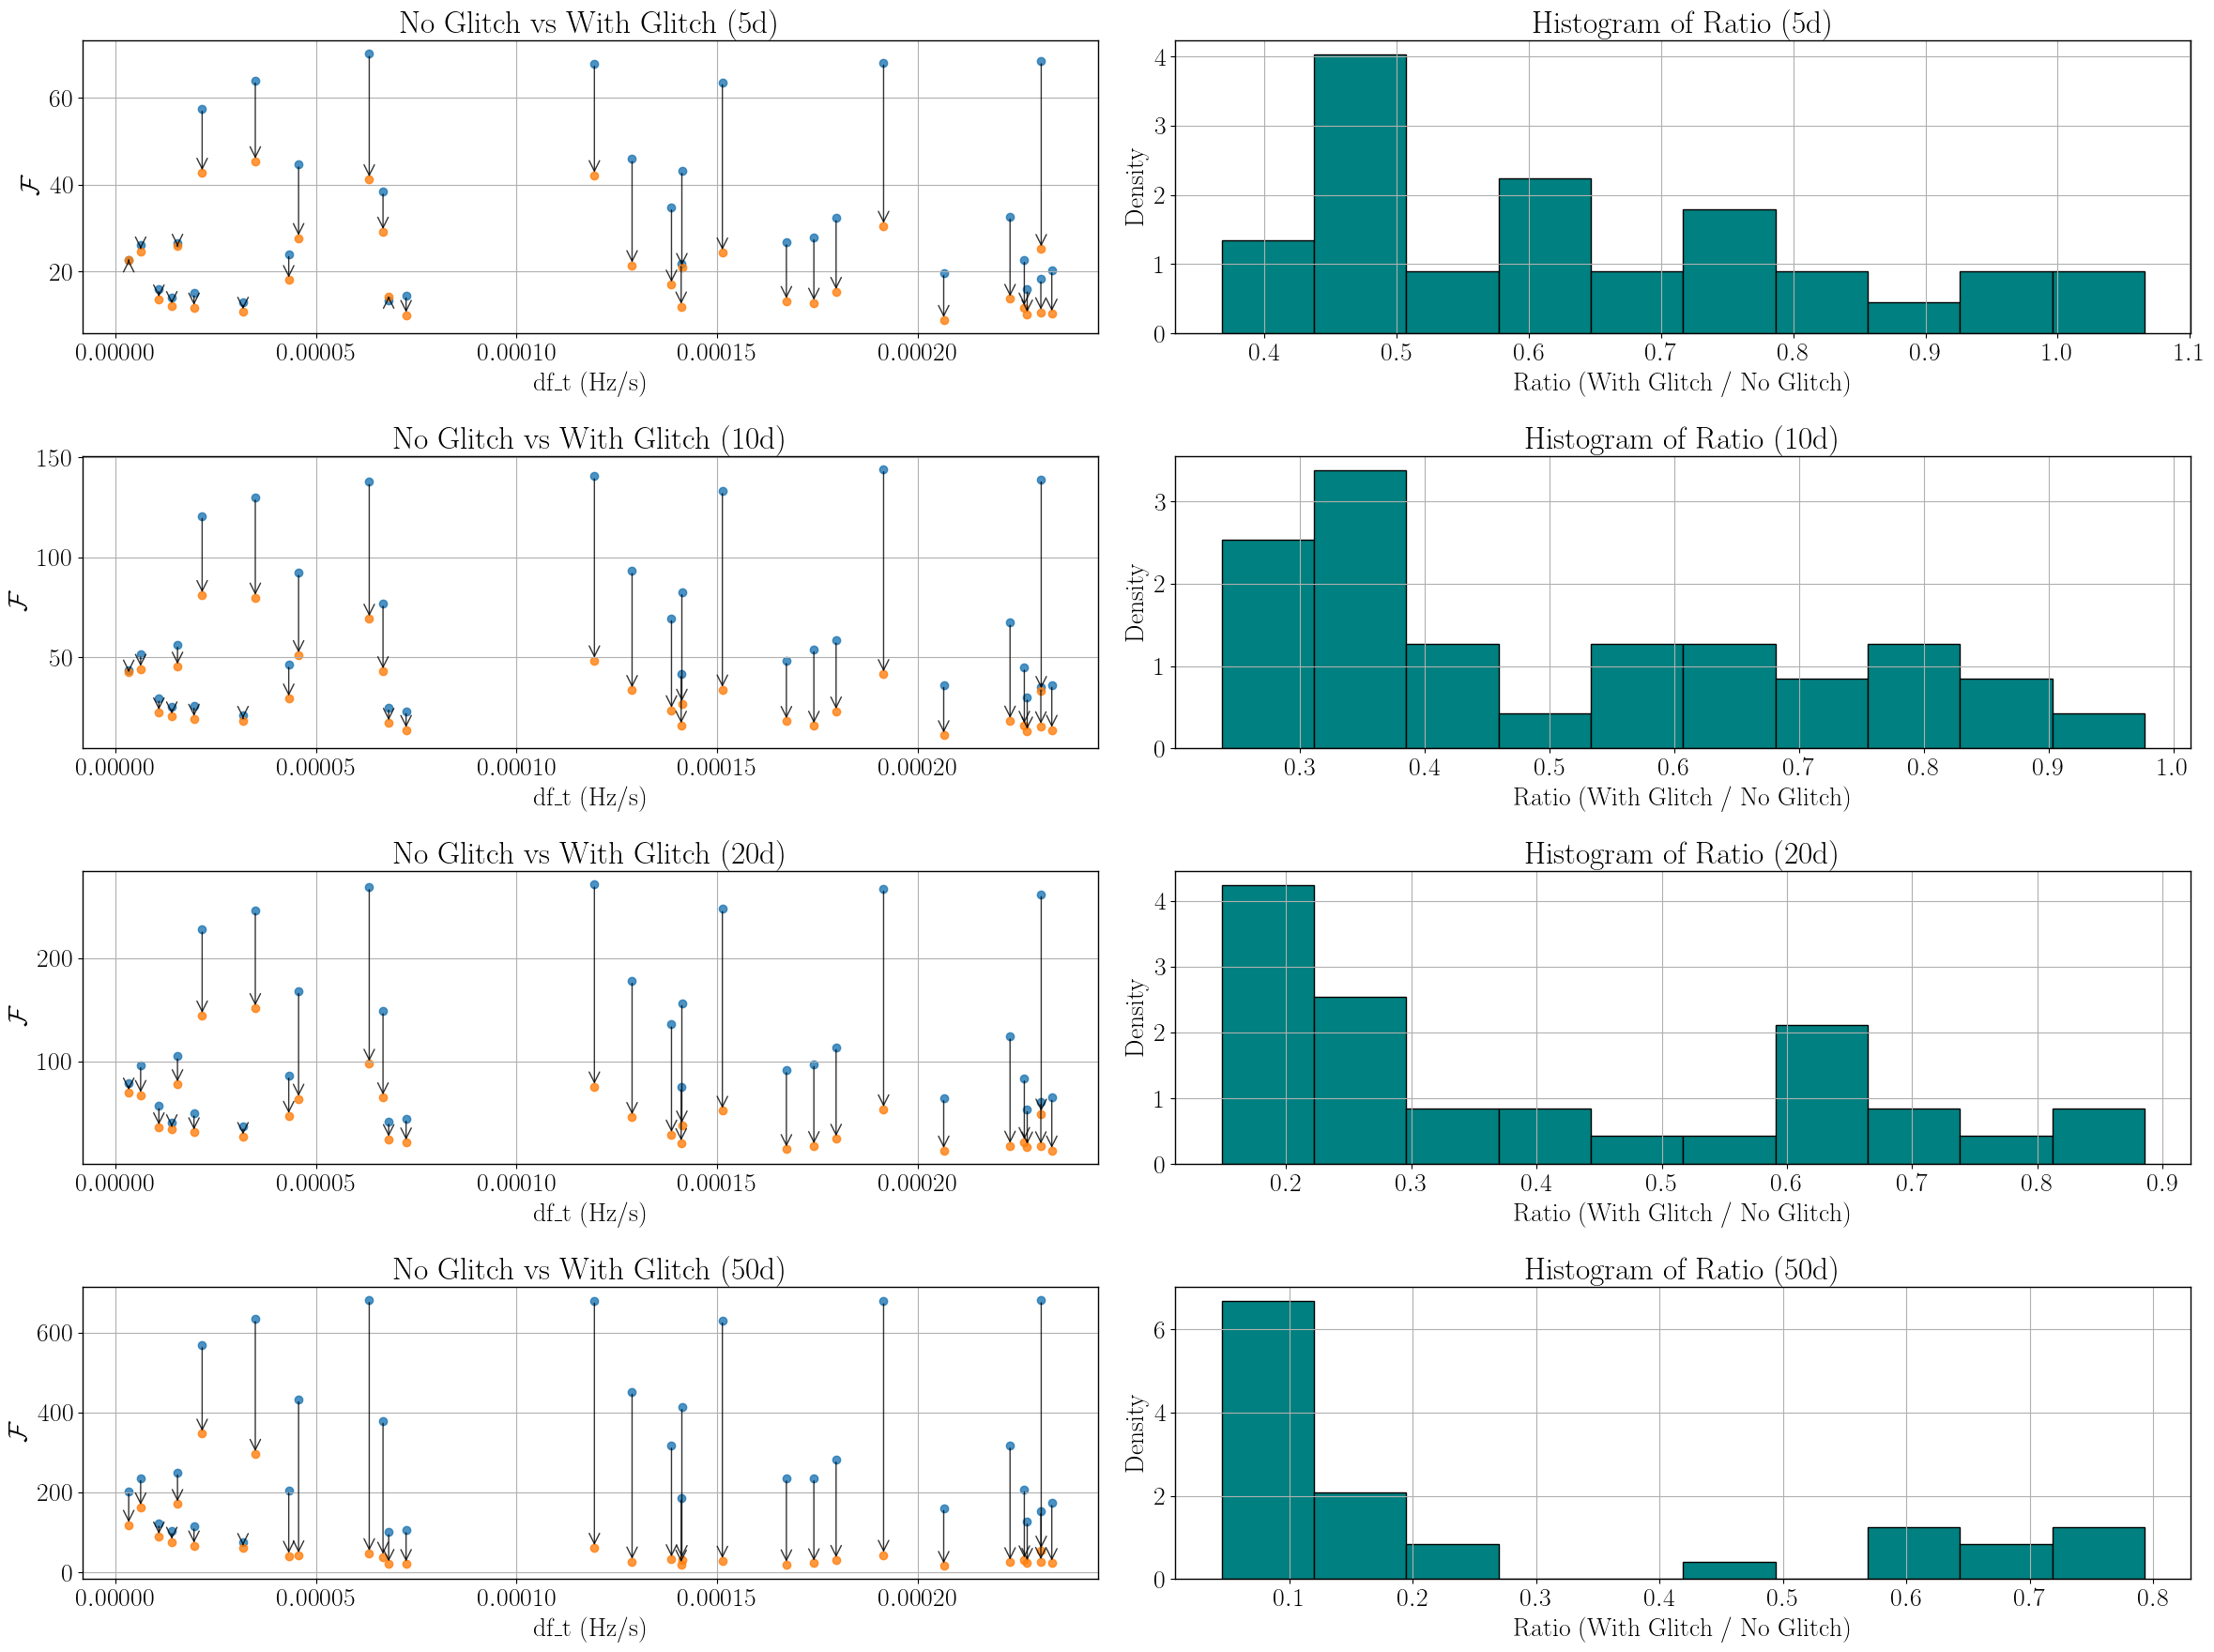

In [233]:
import pandas as pd
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Define durations
durations = ['5d', '10d', '20d', '50d']

df = pd.read_csv(f'./data/with_glitch_df_tg10/100-100Hz/signal_glitch_params.csv')

# Extract parameters
n_glitch = 1  # n glitch per signal
f0 = df['f0'][::n_glitch].values  # size of 32
f1 = df['f1'][::n_glitch].values
f2 = df['f2'][::n_glitch].values
df_p = df['df_p'].values
df_t = df['df_t'].values
df1_p = df['df1_p'].values
q = df['Q'].values
t_glitch = df['tglitch_day'].values
    
x = df_t
# Initialize figure with 3x2 subplots
fig, ax = plt.subplots(4, 2, figsize=(24, 18))

# Loop over durations
for idx, duration in enumerate(durations):
    # Initialize arrays
    a = np.zeros(32)  # No Glitch
    b = np.zeros(32)  # With Glitch
    f0_list = np.zeros((32, 2))
    f1_list = np.zeros((32, 2))
    f2_list = np.zeros((32, 2))

    # Load data
    for i in range(32):
        d1 = fits.open(f'./results/{duration}/no_glitch/100-100Hz/no_glitch_CW{i}.fts')
        d2 = fits.open(f'./results/{duration}/with_glitch_df_tg10/100-100Hz/with_glitch_df_tg10_CW{i}.fts')

        a[i] = d1[1].data['mean2F'][0]
        b[i] = d2[1].data['mean2F'][0]

        f0_list[i, 0] = d1[1].data['freq'][0]
        f1_list[i, 0] = d1[1].data['f1dot'][0]
        f2_list[i, 0] = d1[1].data['f2dot'][0]

        f0_list[i, 1] = d2[1].data['freq'][0]
        f1_list[i, 1] = d2[1].data['f1dot'][0]
        f2_list[i, 1] = d2[1].data['f2dot'][0]

    # Scatter plot: No Glitch vs With Glitch
    ax[idx, 0].scatter(x, a, label='No Glitch', alpha=0.8)
    ax[idx, 0].scatter(x, b, label='With Glitch', alpha=0.8)
    ax[idx, 0].set_xlabel('df_t (Hz/s)')
    ax[idx, 0].set_ylabel(r'$\mathcal{F}$')
    #ax[idx, 0].legend()
    ax[idx, 0].grid(True)
    ax[idx, 0].set_title(f'No Glitch vs With Glitch ({duration})')
    
    for i in range(0, len(x)):  # Every other point
        ax[idx, 0].annotate('', xy=(x[i], b[i]), xytext=(x[i], a[i]), 
                            arrowprops=dict(arrowstyle='->', color='k', alpha=0.8))

    # Histogram: Ratio (With Glitch / No Glitch)
    ratios = b / a
    ax[idx, 1].hist(ratios, bins=10, color='teal', edgecolor='black', density=True)
    ax[idx, 1].set_xlabel('Ratio (With Glitch / No Glitch)')
    ax[idx, 1].set_ylabel('Density')
    ax[idx, 1].grid(True)
    ax[idx, 1].set_title(f'Histogram of Ratio ({duration})')

# Adjust layout
plt.tight_layout()
plt.show()

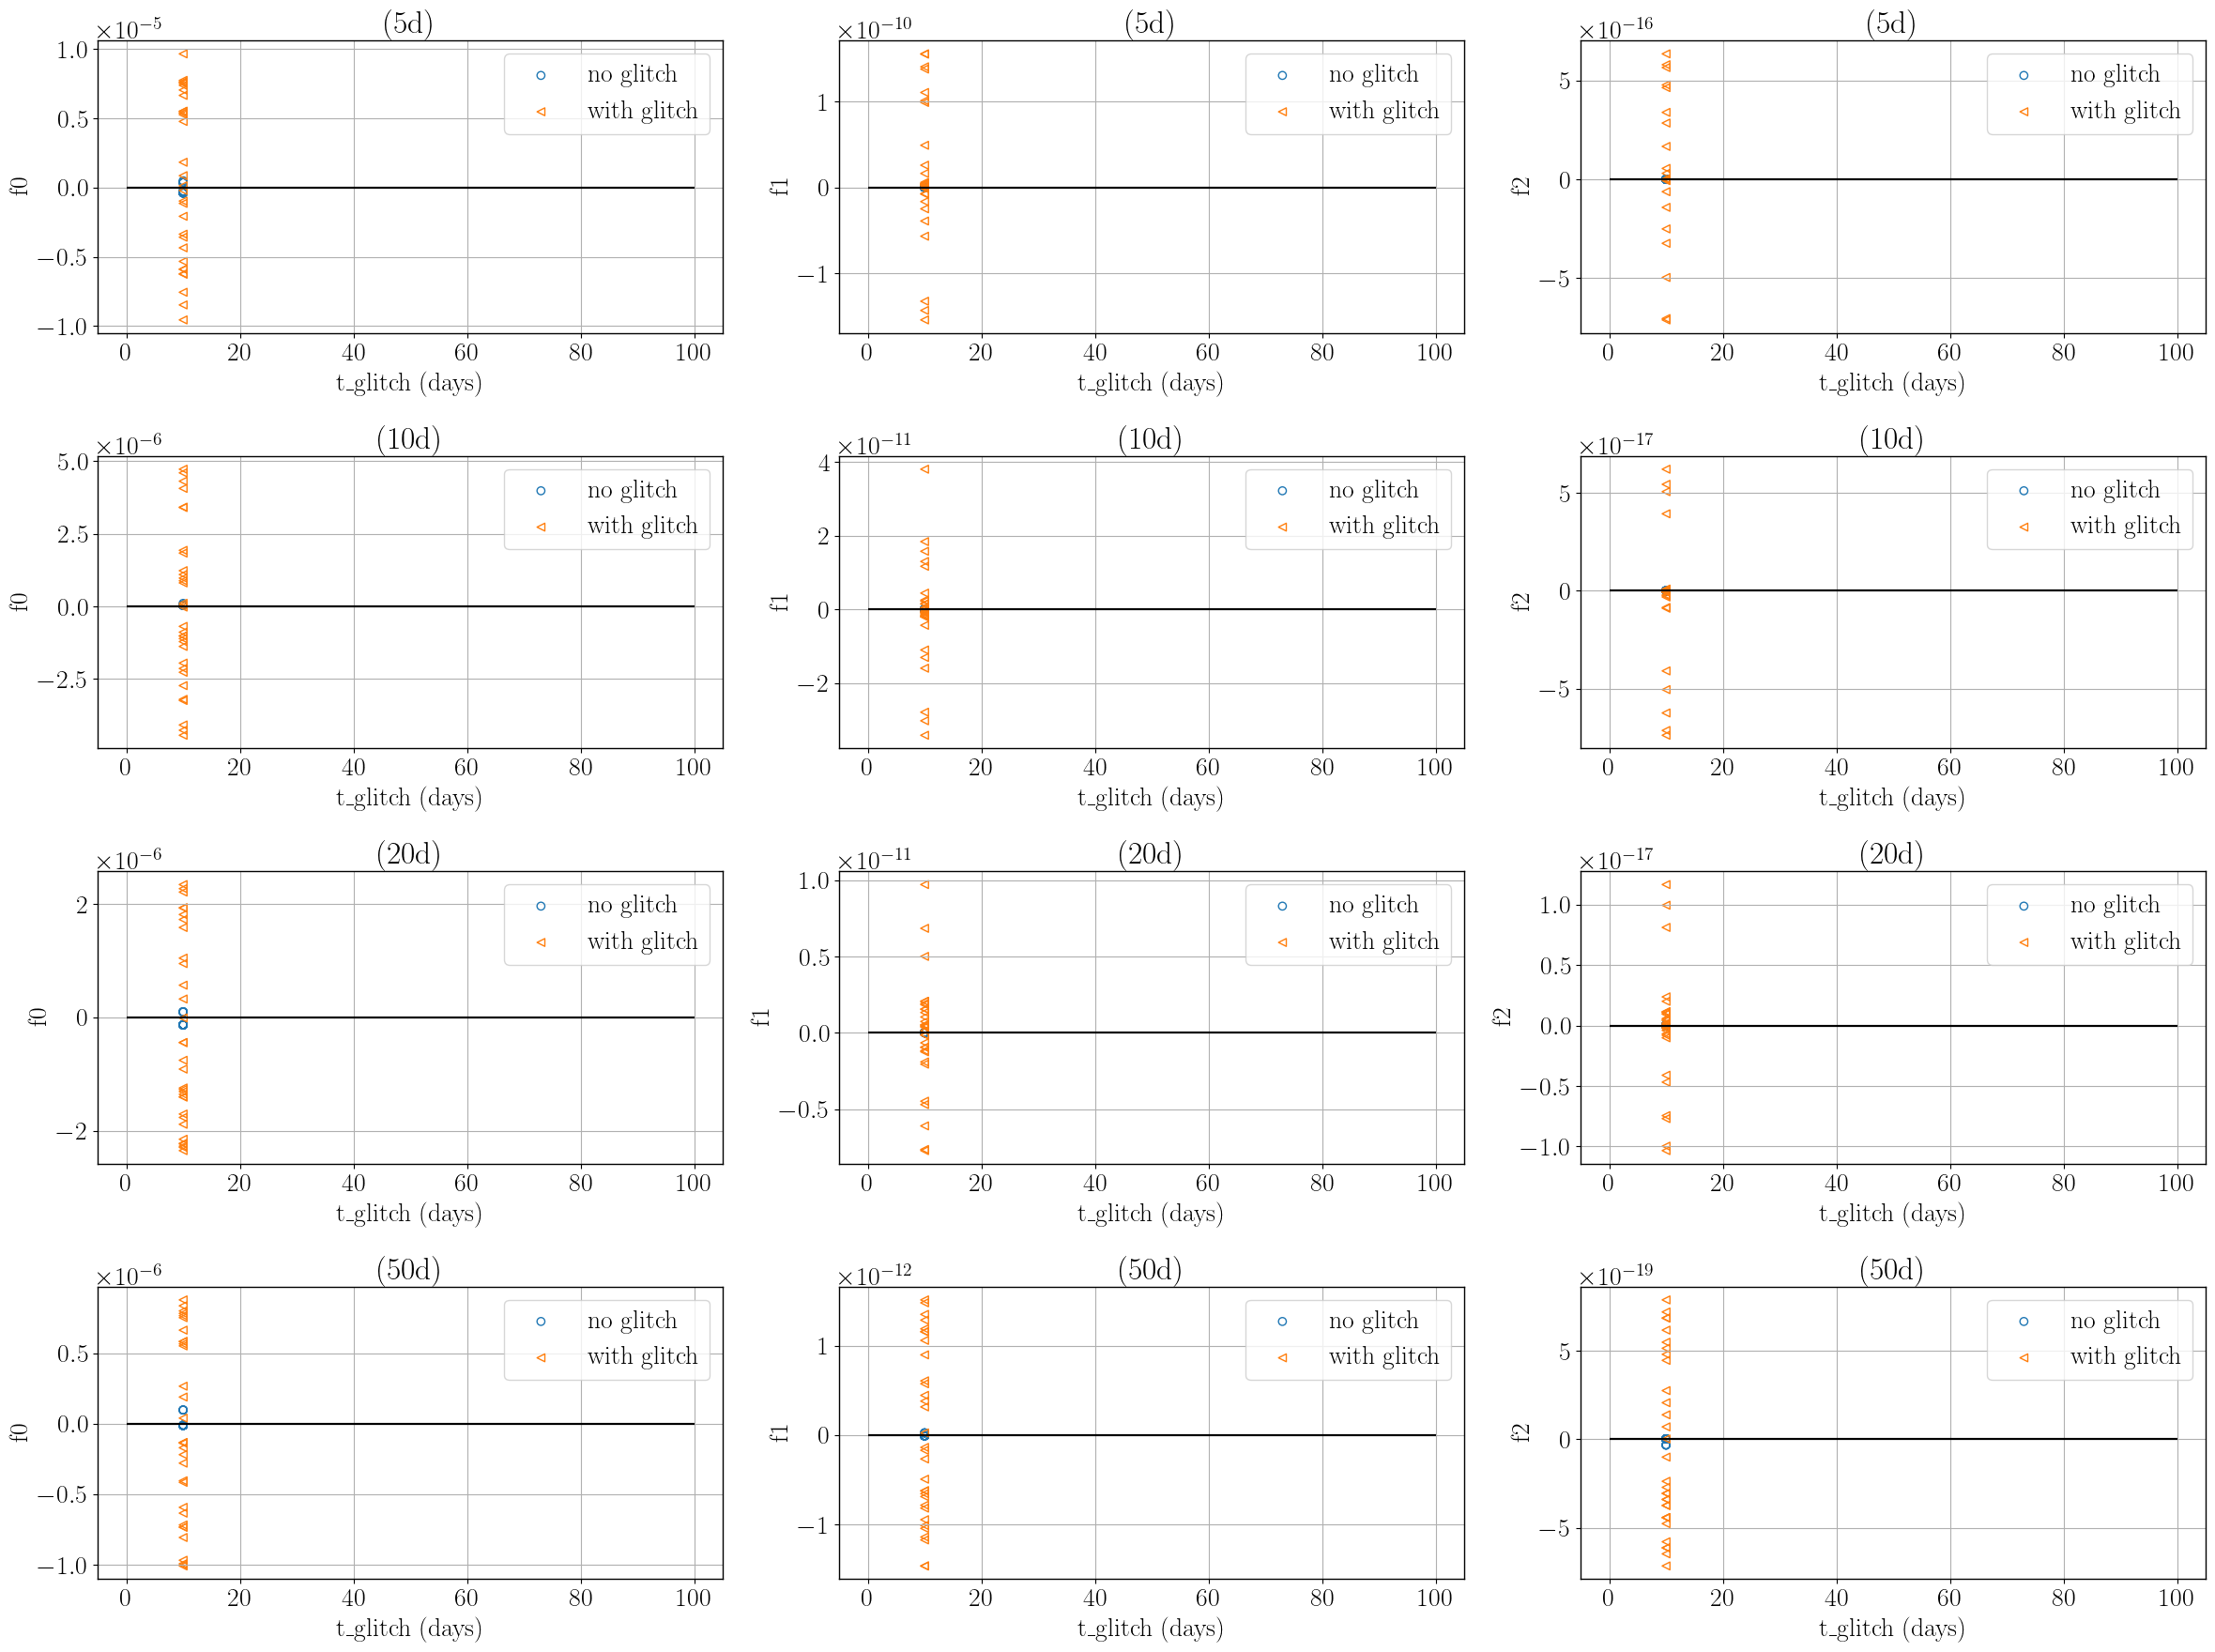

In [226]:
# Load the CSV file
df = pd.read_csv(f'./data/with_glitch_dfdotlarge/100-100Hz/signal_glitch_params.csv')

# Extract parameters
n_glitch = 1  # n glitch per signal
f0 = df['f0'][::n_glitch].values  # size of 32
f1 = df['f1'][::n_glitch].values
f2 = df['f2'][::n_glitch].values
df_p = df['df_p'].values
df_t = df['df_t'].values
df1_p = df['df1_p'].values
q = df['Q'].values
t_glitch = df['tglitch_day'].values

# Define durations
durations = ['5d', '10d', '20d', '50d']
marker = ['o', '<', '>']
labels = ['no glitch', 'with glitch', 'no glitch noise v2']
# Initialize figure with 3x2 subplots
fig, ax = plt.subplots(4, 3, figsize=(24, 18))

# Loop over durations
for idx, duration in enumerate(durations):

    f0_list = np.zeros((32, 2))
    f1_list = np.zeros((32, 2))
    f2_list = np.zeros((32, 2))

    # Load data
    for i in range(32):
        d1 = fits.open(f'./results/{duration}/no_glitch/100-100Hz/no_glitch_CW{i}.fts')
        d2 = fits.open(f'./results/{duration}/with_glitch_dfdotlarge/100-100Hz/with_glitch_dfdotlarge_CW{i}.fts')
        
        f0_list[i, 0] = d1[1].data['freq'][0]
        f1_list[i, 0] = d1[1].data['f1dot'][0]
        f2_list[i, 0] = d1[1].data['f2dot'][0]

        f0_list[i, 1] = d2[1].data['freq'][0]
        f1_list[i, 1] = d2[1].data['f1dot'][0]
        f2_list[i, 1] = d2[1].data['f2dot'][0]
        
    data = [f0_list, f1_list, f2_list]
    truth = [f0, f1, f2]
    for plot_i in range(3):
        for j in range(2):
            
            ax[idx, plot_i].scatter(t_glitch, (data[plot_i][:, j]-truth[plot_i]), color=colors[j], label=labels[j], marker=marker[j], facecolors='none')
            ax[idx, plot_i].hlines([0], 0, 100, color ="k")
    #        ax[idx, i].scatter(t_glitch, b, label='With Glitch', alpha=0.8)
            ax[idx, plot_i].set_xlabel('t_glitch (days)')
            ax[idx, plot_i].set_ylabel(f'f{plot_i}')
            ax[idx, plot_i].legend()
            ax[idx, plot_i].grid(True)
            ax[idx, plot_i].set_title(f'({duration})')

# Adjust layout
plt.tight_layout()
plt.show()

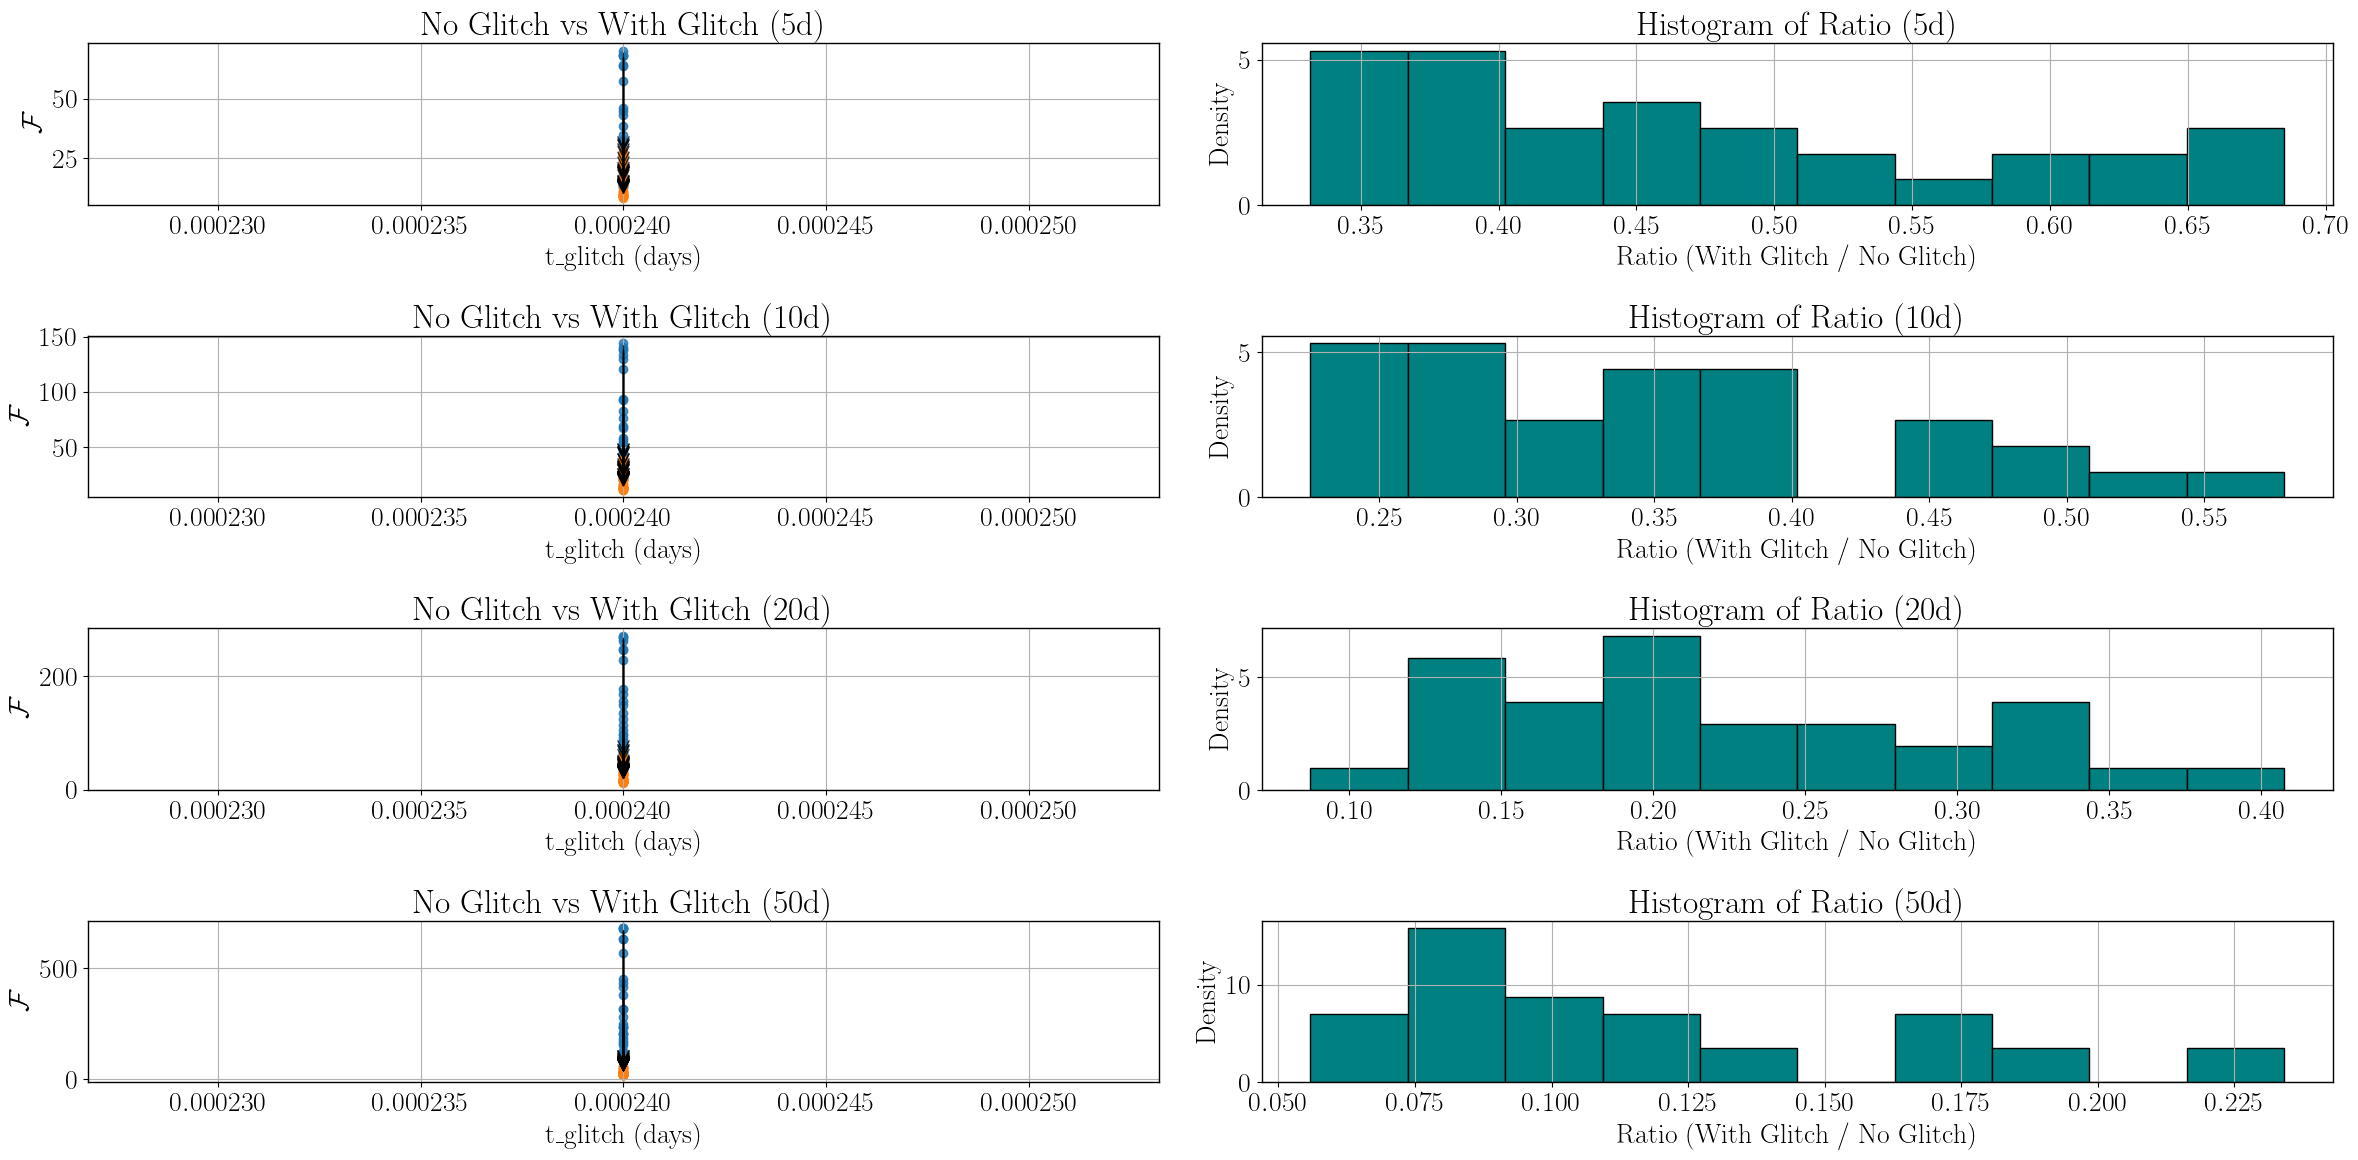

In [223]:
import pandas as pd
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Define durations
durations = ['5d', '10d', '20d', '50d']

# Initialize figure with 3x2 subplots
fig, ax = plt.subplots(4, 2, figsize=(24, 12))

# Loop over durations
for idx, duration in enumerate(durations):
    # Load the CSV file
    df = pd.read_csv(f'./data/with_glitch_dflarge/100-100Hz/signal_glitch_params.csv')

    # Extract parameters
    n_glitch = 1  # n glitch per signal
    f0 = df['f0'][::n_glitch].values  # size of 32
    f1 = df['f1'][::n_glitch].values
    f2 = df['f2'][::n_glitch].values
    df_p = df['df_p'].values
    df_t = df['df_t'].values
    df1_p = df['df1_p'].values
    q = df['Q'].values
    t_glitch = df['tglitch_day'].values

    # Initialize arrays
    a = np.zeros(32)  # No Glitch
    b = np.zeros(32)  # With Glitch
    f0_list = np.zeros((32, 2))
    f1_list = np.zeros((32, 2))
    f2_list = np.zeros((32, 2))

    # Load data
    for i in range(32):
        d1 = fits.open(f'./results/{duration}/no_glitch/100-100Hz/no_glitch_CW{i}.fts')
        d2 = fits.open(f'./results/{duration}/with_glitch_dflarge/100-100Hz/with_glitch_dflarge_CW{i}.fts')

        a[i] = d1[1].data['mean2F'][0]
        b[i] = d2[1].data['mean2F'][0]

        f0_list[i, 0] = d1[1].data['freq'][0]
        f1_list[i, 0] = d1[1].data['f1dot'][0]
        f2_list[i, 0] = d1[1].data['f2dot'][0]

        f0_list[i, 1] = d2[1].data['freq'][0]
        f1_list[i, 1] = d2[1].data['f1dot'][0]
        f2_list[i, 1] = d2[1].data['f2dot'][0]

    # Scatter plot: No Glitch vs With Glitch
    ax[idx, 0].scatter(df_t, a, label='No Glitch', alpha=0.8)
    ax[idx, 0].scatter(df_t, b, label='With Glitch', alpha=0.8)
    ax[idx, 0].set_xlabel('t_glitch (days)')
    ax[idx, 0].set_ylabel(r'$\mathcal{F}$')
    #ax[idx, 0].legend()
    ax[idx, 0].grid(True)
    ax[idx, 0].set_title(f'No Glitch vs With Glitch ({duration})')
    
    for i in range(0, len(df_t)):  # Every other point
        ax[idx, 0].annotate('', xy=(df_t[i], b[i]), xytext=(df_t[i], a[i]), 
                            arrowprops=dict(arrowstyle='->', color='k', alpha=0.8))

    # Histogram: Ratio (With Glitch / No Glitch)
    ratios = b / a
    ax[idx, 1].hist(ratios, bins=10, color='teal', edgecolor='black', density=True)
    ax[idx, 1].set_xlabel('Ratio (With Glitch / No Glitch)')
    ax[idx, 1].set_ylabel('Density')
    ax[idx, 1].grid(True)
    ax[idx, 1].set_title(f'Histogram of Ratio ({duration})')

# Adjust layout
plt.tight_layout()
plt.show()

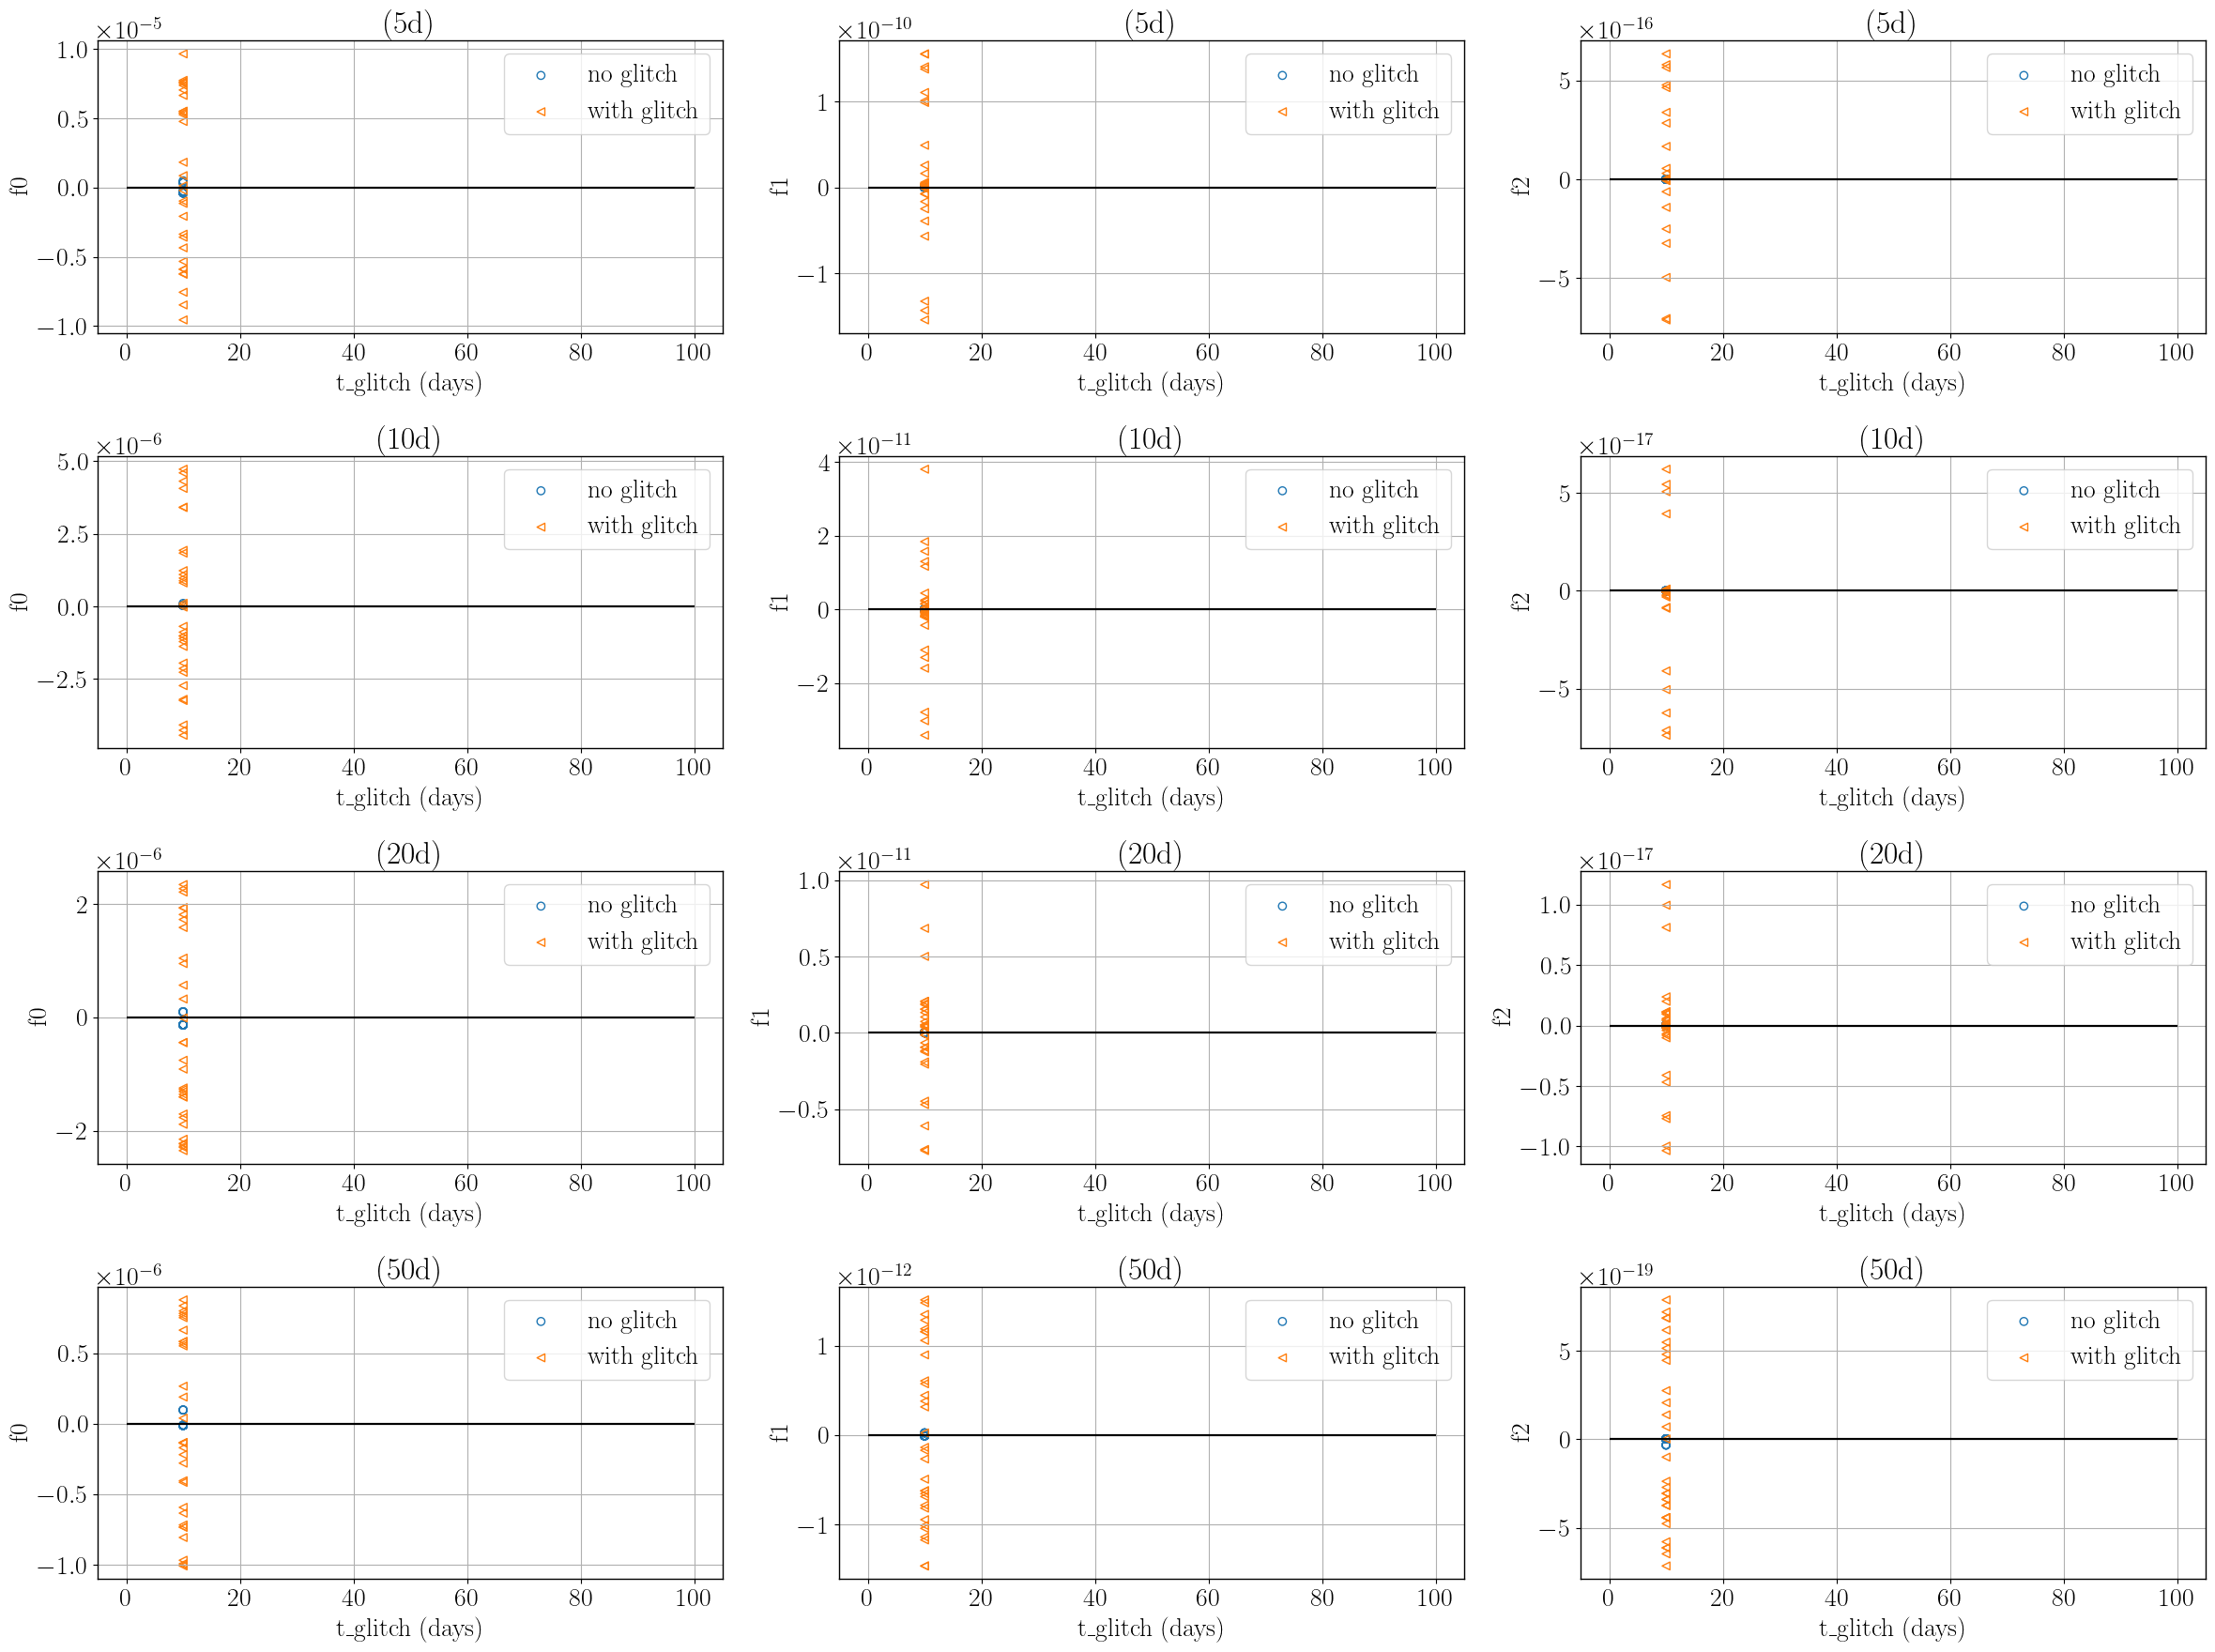

In [224]:
# Load the CSV file
df = pd.read_csv(f'./data/with_glitch_dfdotlarge/100-100Hz/signal_glitch_params.csv')

# Extract parameters
n_glitch = 1  # n glitch per signal
f0 = df['f0'][::n_glitch].values  # size of 32
f1 = df['f1'][::n_glitch].values
f2 = df['f2'][::n_glitch].values
df_p = df['df_p'].values
df_t = df['df_t'].values
df1_p = df['df1_p'].values
q = df['Q'].values
t_glitch = df['tglitch_day'].values

# Define durations
durations = ['5d', '10d', '20d', '50d']
marker = ['o', '<', '>']
labels = ['no glitch', 'with glitch', 'no glitch noise v2']
# Initialize figure with 3x2 subplots
fig, ax = plt.subplots(4, 3, figsize=(24, 18))

# Loop over durations
for idx, duration in enumerate(durations):

    f0_list = np.zeros((32, 2))
    f1_list = np.zeros((32, 2))
    f2_list = np.zeros((32, 2))

    # Load data
    for i in range(32):
        d1 = fits.open(f'./results/{duration}/no_glitch/100-100Hz/no_glitch_CW{i}.fts')
        d2 = fits.open(f'./results/{duration}/with_glitch_dfdotlarge/100-100Hz/with_glitch_dfdotlarge_CW{i}.fts')
        
        f0_list[i, 0] = d1[1].data['freq'][0]
        f1_list[i, 0] = d1[1].data['f1dot'][0]
        f2_list[i, 0] = d1[1].data['f2dot'][0]

        f0_list[i, 1] = d2[1].data['freq'][0]
        f1_list[i, 1] = d2[1].data['f1dot'][0]
        f2_list[i, 1] = d2[1].data['f2dot'][0]
        
    data = [f0_list, f1_list, f2_list]
    truth = [f0, f1, f2]
    for plot_i in range(3):
        for j in range(2):
            
            ax[idx, plot_i].scatter(t_glitch, (data[plot_i][:, j]-truth[plot_i]), color=colors[j], label=labels[j], marker=marker[j], facecolors='none')
            ax[idx, plot_i].hlines([0], 0, 100, color ="k")
    #        ax[idx, i].scatter(t_glitch, b, label='With Glitch', alpha=0.8)
            ax[idx, plot_i].set_xlabel('t_glitch (days)')
            ax[idx, plot_i].set_ylabel(f'f{plot_i}')
            ax[idx, plot_i].legend()
            ax[idx, plot_i].grid(True)
            ax[idx, plot_i].set_title(f'({duration})')

# Adjust layout
plt.tight_layout()
plt.show()

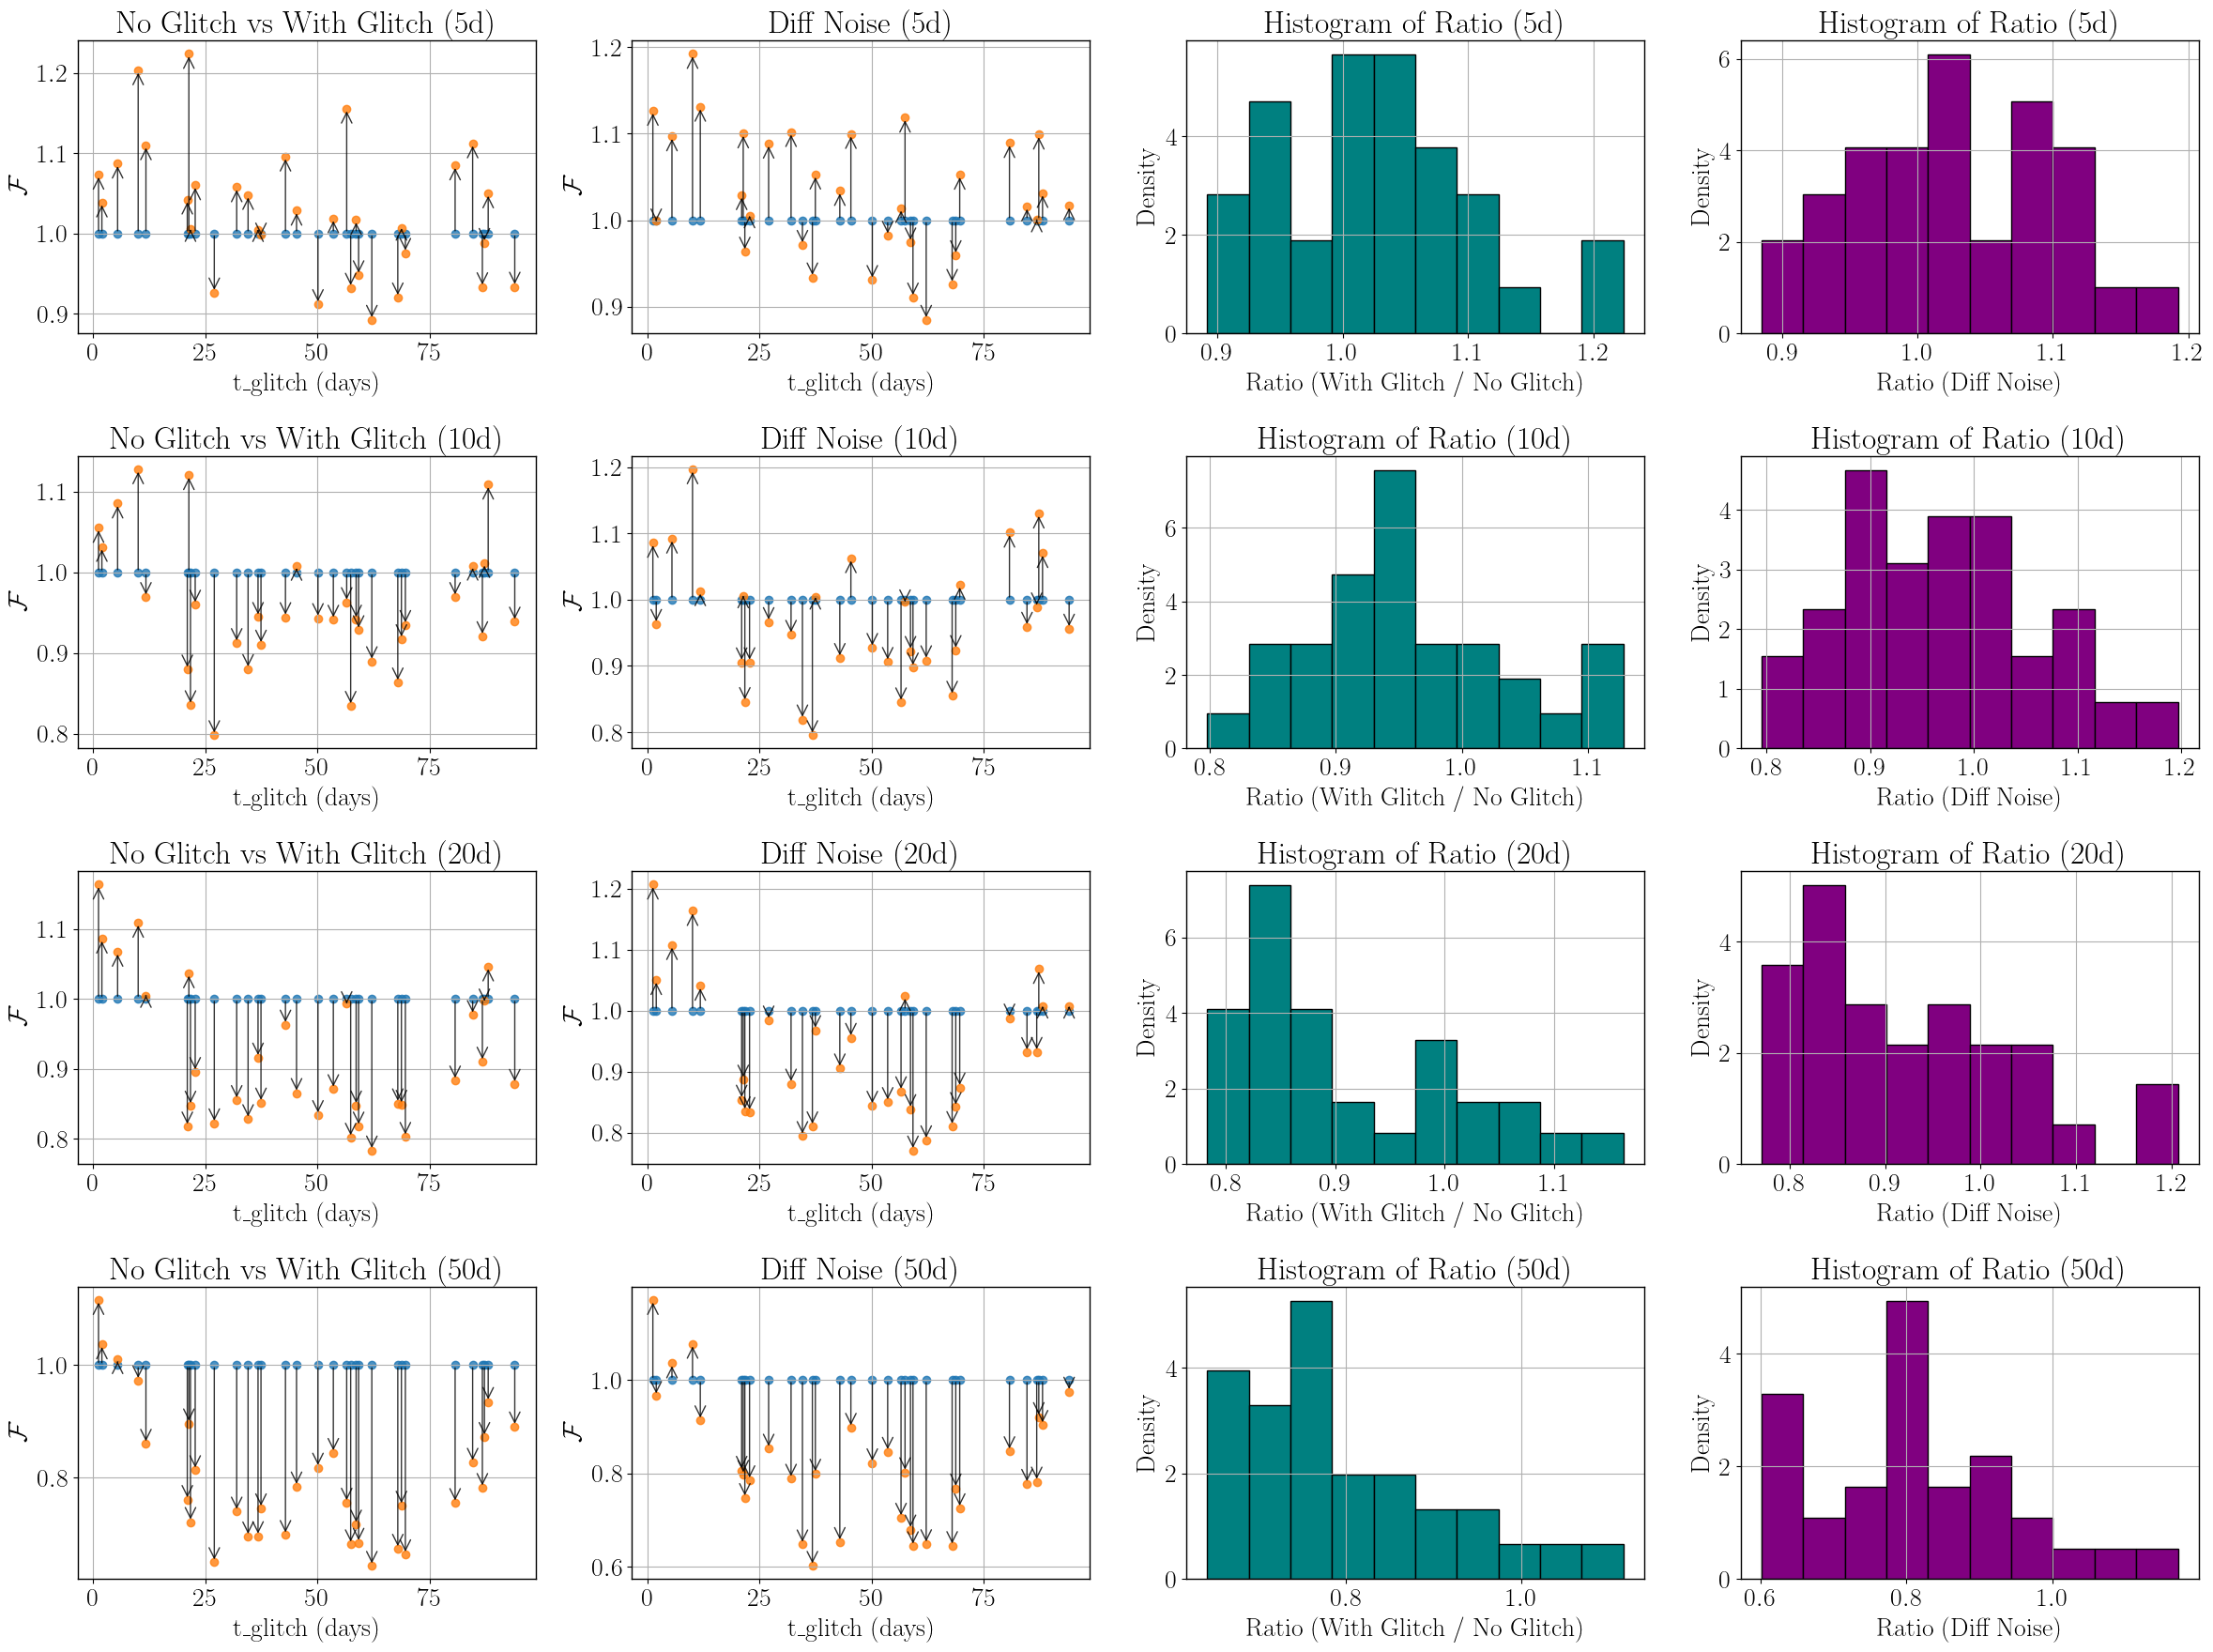

In [277]:
import pandas as pd
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv(f'./data/with_glitch_onlytglitch_v2/100-100Hz/signal_glitch_params.csv')

# Extract parameters
n_glitch = 1  # n glitch per signal
f0 = df['f0'][::n_glitch].values  # size of 32
f1 = df['f1'][::n_glitch].values
f2 = df['f2'][::n_glitch].values
df_p = df['df_p'].values
df_t = df['df_t'].values
df1_p = df['df1_p'].values
q = df['Q'].values
t_glitch = df['tglitch_day'].values

# Define durations
durations = ['5d', '10d', '20d', '50d']

# Initialize figure with 3x2 subplots
fig, ax = plt.subplots(4, 4, figsize=(24, 18))

# Loop over durations
for idx, duration in enumerate(durations):

    # Initialize arrays
    a = np.zeros(32)  # No Glitch
    b = np.zeros(32)  # With Glitch
    c = np.zeros(32)  # No Glitch Diff Noise

    # Load data
    for i in range(32):
        d1 = fits.open(f'./results/{duration}/no_glitch_v2/100-100Hz/no_glitch_v2_CW{i}.fts')
        d2 = fits.open(f'./results/{duration}/with_glitch_onlytglitch_v2/100-100Hz/with_glitch_onlytglitch_v2_CW{i}.fts')
        d3 = fits.open(f'./results/{duration}/no_glitch_diffnoise_v2/100-100Hz/no_glitch_diffnoise_v2_CW{i}.fts')

        a[i] = d1[1].data['mean2F'][0]
        b[i] = d2[1].data['mean2F'][0]
        c[i] = d3[1].data['mean2F'][0]

    # Scatter plot: No Glitch vs With Glitch
    ax[idx, 0].scatter(t_glitch, a/a, label='No Glitch', alpha=0.8)
    ax[idx, 0].scatter(t_glitch, b/a, label='With Glitch', alpha=0.8)
    ax[idx, 0].set_xlabel('t_glitch (days)')
    ax[idx, 0].set_ylabel(r'$\mathcal{F}$')
    #ax[idx, 0].legend()
    ax[idx, 0].grid(True)
    ax[idx, 0].set_title(f'No Glitch vs With Glitch ({duration})')
    
    for i in range(0, len(t_glitch)):  # Every other point
        ax[idx, 0].annotate('', xy=(t_glitch[i], b[i]/a[i]), xytext=(t_glitch[i], a[i]/a[i]), 
                            arrowprops=dict(arrowstyle='->', color='k', alpha=0.8))
    
    # Scatter plot: No Glitch vs With Glitch
    ax[idx, 1].scatter(t_glitch, a/a, alpha=0.8)
    ax[idx, 1].scatter(t_glitch, c/a, alpha=0.8)
    ax[idx, 1].set_xlabel('t_glitch (days)')
    ax[idx, 1].set_ylabel(r'$\mathcal{F}$')
    #ax[idx, 1].legend(loc='upper right')
    ax[idx, 1].grid(True)
    ax[idx, 1].set_title(f'Diff Noise ({duration})')
    
    for i in range(0, len(t_glitch)):  # Every other point
        ax[idx, 1].annotate('', xy=(t_glitch[i], c[i]/a[i]), xytext=(t_glitch[i], a[i]/a[i]), 
                            arrowprops=dict(arrowstyle='->', color='k', alpha=0.8))

    # Histogram: Ratio (With Glitch / No Glitch)
    ratios = b / a
    ax[idx, 2].hist(ratios, bins=10, color='teal', edgecolor='black', density=True)
    ax[idx, 2].set_xlabel('Ratio (With Glitch / No Glitch)')
    ax[idx, 2].set_ylabel('Density')
    ax[idx, 2].grid(True)
    ax[idx, 2].set_title(f'Histogram of Ratio ({duration})')
    
    
    # Histogram: Ratio (Diff Noise)
    ratios = c / a
    ax[idx, 3].hist(ratios, bins=10, color='purple', edgecolor='black', density=True)
    ax[idx, 3].set_xlabel('Ratio (Diff Noise)')
    ax[idx, 3].set_ylabel('Density')
    ax[idx, 3].grid(True)
    ax[idx, 3].set_title(f'Histogram of Ratio ({duration})')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Load the CSV file
df = pd.read_csv(f'./data/with_glitch_dfdotlarge/100-100Hz/signal_glitch_params.csv')

# Extract parameters
n_glitch = 1  # n glitch per signal
f0 = df['f0'][::n_glitch].values  # size of 32
f1 = df['f1'][::n_glitch].values
f2 = df['f2'][::n_glitch].values
df_p = df['df_p'].values
df_t = df['df_t'].values
df1_p = df['df1_p'].values
q = df['Q'].values
t_glitch = df['tglitch_day'].values
x = t_glitch
# Define durations
durations = ['5d', '10d', '20d', '50d']
marker = ['o', '<', '>']
labels = ['no glitch', 'with glitch', 'no glitch noise v2']
# Initialize figure with 3x2 subplots
fig, ax = plt.subplots(4, 3, figsize=(24, 18))

# Loop over durations
for idx, duration in enumerate(durations):

    f0_list = np.zeros((32, 2))
    f1_list = np.zeros((32, 2))
    f2_list = np.zeros((32, 2))

    # Load data
    for i in range(32):
        d1 = fits.open(f'./results/{duration}/no_glitch/100-100Hz/no_glitch_CW{i}.fts')
        d2 = fits.open(f'./results/{duration}/with_glitch_dfdotlarge/100-100Hz/with_glitch_dfdotlarge_CW{i}.fts')
        
        f0_list[i, 0] = d1[1].data['freq'][0]
        f1_list[i, 0] = d1[1].data['f1dot'][0]
        f2_list[i, 0] = d1[1].data['f2dot'][0]

        f0_list[i, 1] = d2[1].data['freq'][0]
        f1_list[i, 1] = d2[1].data['f1dot'][0]
        f2_list[i, 1] = d2[1].data['f2dot'][0]
        
    data = [f0_list, f1_list, f2_list]
    truth = [f0, f1, f2]
    for plot_i in range(3):
        for j in range(2):
            
            ax[idx, plot_i].scatter(x, (data[plot_i][:, j]-truth[plot_i]), color=colors[j], label=labels[j], marker=marker[j], facecolors='none')
            ax[idx, plot_i].hlines([0], 0, 100, color ="k")
    #        ax[idx, i].scatter(t_glitch, b, label='With Glitch', alpha=0.8)
            ax[idx, plot_i].set_xlabel('t_glitch (days)')
            ax[idx, plot_i].set_ylabel(f'f{plot_i}')
            ax[idx, plot_i].legend()
            ax[idx, plot_i].grid(True)
            ax[idx, plot_i].set_title(f'({duration})')

# Adjust layout
plt.tight_layout()
plt.show()